# Stock Price Prediction Project

## 1. Project Concept and Scope
### Objective
To predict future stock prices of specific companies representing different market sectors, using historical data.

### Scope
The project will focus on PLUG (Energy), NIO (Automotive), NTLA (Healthcare), SNAP (Communication Services), and CHPT (Industrials).

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

### Overview of Selected Stocks

This notebook provides an overview of five distinct stocks, each representing different sectors and industries. The stocks covered are:

1. **PLUG (Plug Power Inc.)**: 
   - Sector: Energy
   - Industry: Electrical Equipment & Parts
   - Description: Plug Power is an innovator in hydrogen and fuel cell technology, providing comprehensive hydrogen fuel cell turnkey solutions.

2. **NIO (NIO Inc.)**:
   - Sector: Automotive
   - Industry: Auto Manufacturers
   - Description: NIO is a pioneer in China's premium electric vehicle market, specializing in designing, manufacturing, and selling electric vehicles.

3. **NTLA (Intellia Therapeutics Inc.)**:
   - Sector: Healthcare
   - Industry: Biotechnology
   - Description: Intellia Therapeutics is a leading biotechnology company developing therapies using a CRISPR/Cas9 gene-editing system.

4. **SNAP (Snap Inc.)**:
   - Sector: Communication Services
   - Industry: Internet Content & Information
   - Description: Snap Inc. is the parent company of Snapchat, a popular social media platform known for its ephemeral messaging and multimedia features.

5. **CHPT (ChargePoint Holdings Inc.)**:
   - Sector: Industrials
   - Industry: Specialty Industrial Machinery
   - Description: ChargePoint Holdings is at the forefront of electric vehicle charging infrastructure, offering a comprehensive array of charging solutions.

Each of these companies represents a unique investment opportunity within its respective sector, reflecting different aspects of technological and industrial advancement.


## 2. Data Collection
- Utilize Alpha Vantage API for historical stock price data.
- Gather comprehensive data including prices, volumes, and market indicators.

In [2]:
"""
This script imports necessary libraries for stock price prediction.
"""
import os
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']

In [13]:
import time
import os
from alpha_vantage.timeseries import TimeSeries

def retrieve_stock_data(symbols):
    """
    Retrieve historical stock data for a given list of symbols using Alpha Vantage API.
    Deletes old CSV files if newer data is found and downloaded. If API limit is reached, it will print a message and continue with the next symbol.

    Parameters:
    symbols (list): A list of stock symbols to retrieve data for.

    Returns:
    None
    """
    # Read the API key from the file
    with open('AlphaVantage.txt', 'r') as file:
        api_key = file.read().strip()

    # Create a TimeSeries object with your API key
    ts = TimeSeries(key=api_key, output_format='pandas')

    # Loop through the symbols and retrieve the historical data
    for symbol in symbols:
        try:
            # Get the historical data for the symbol
            data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
            
            # Sort the data by index (date) just in case
            data.sort_index(inplace=True)

            # Get the first and last dates
            first_date = data.index[0].strftime('%Y-%m-%d')
            last_date = data.index[-1].strftime('%Y-%m-%d')

            # Generate the new file name
            new_file_name = f'{first_date}_{last_date}_{symbol}_historical_data.csv'

            # Check if a file for this symbol already exists
            existing_files = [f for f in os.listdir() if f.endswith(f'{symbol}_historical_data.csv')]
            if existing_files:
                # Sort files to find the most recent one
                existing_files.sort()
                most_recent_file = existing_files[-1]

                # Extract dates from the most recent file name
                existing_first_date, existing_last_date, *_ = most_recent_file.split('_')

                # Compare dates (strings comparison works because of the YYYY-MM-DD format)
                if existing_first_date <= first_date and existing_last_date >= last_date:
                    print(f"Data already up-to-date for {symbol}")
                    continue
                else:
                    # Remove older files
                    for file in existing_files:
                        os.remove(file)
                        print(f"Old file {file} deleted for {symbol}")

            # Save the new data to a CSV file
            data.to_csv(new_file_name)
            print(f"New data saved for {symbol}: {new_file_name}")

        except ValueError as e:
            print(f"Error retrieving data for {symbol}: {e}")
            # Optional: sleep for some time before continuing, or handle the error as needed
            # time.sleep(60)  # Sleep for 1 minute, for example

# Example usage
symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']
retrieve_stock_data(symbols_list)


Data already up-to-date for PLUG


ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [5]:
import glob
import pandas as pd

def load_stock_data(symbols):
    """
    Load the most recent, up-to-date historical data CSV files into variables.
    The 'Date' column in each CSV file is used as the DataFrame index and parsed as dates.

    Parameters:
    symbols (list): A list of stock symbols to load data for.

    Returns:
    dict: A dictionary containing the loaded data frames, with stock symbols as keys.
    """
    data_frames = {}

    for symbol in symbols:
        # Find the most recent CSV file for the symbol
        files = glob.glob(f'*{symbol}_historical_data.csv')
        if files:
            files.sort()
            most_recent_file = files[-1]

            # Load the CSV file into a data frame with 'Date' as the index column and parse dates
            data_frames[symbol] = pd.read_csv(most_recent_file, index_col='date', parse_dates=['date'])
            print(f"Data loaded for {symbol}: {most_recent_file}")
        else:
            print(f"No data found for {symbol}")

    return data_frames

# Example usage
# symbols_list should be defined earlier in your script
# e.g., symbols_list = ['AAPL', 'GOOGL', 'MSFT']
stock_data = load_stock_data(symbols_list)


Data loaded for PLUG: 1999-11-01_2024-01-22_PLUG_historical_data.csv
Data loaded for NIO: 2018-09-12_2024-01-22_NIO_historical_data.csv
Data loaded for NTLA: 2016-05-06_2024-01-22_NTLA_historical_data.csv
Data loaded for SNAP: 2017-03-02_2024-01-22_SNAP_historical_data.csv
Data loaded for CHPT: 2019-09-16_2024-01-22_CHPT_historical_data.csv


### Looking at the heads of our data

In [6]:
stock_data['PLUG'].head()

1. open  2. high  3. low  4. close  5. volume
date                                                     
1999-11-01    16.75    16.75   15.00     16.00  1506000.0
1999-11-02    16.44    20.00   16.38     17.88  1701000.0
1999-11-03    18.88    19.31   18.13     18.63   683000.0
1999-11-04    19.44    19.88   18.63     19.06   480000.0
1999-11-05    19.09    19.50   17.38     17.38   489000.0

In [5]:
stock_data['NIO'].head()

1. open  2. high  3. low  4. close    5. volume
date                                                       
2018-09-12     6.00     6.93    5.35      6.60   66848996.0
2018-09-13     6.62    12.69    6.52     11.60  158346488.0
2018-09-14    12.66    13.80    9.22      9.90  172473559.0
2018-09-17     9.61     9.75    8.50      8.50   56323875.0
2018-09-18     8.73     9.10    7.67      7.68   41827593.0

In [6]:
stock_data['NTLA'].head()

1. open  2. high  3. low  4. close  5. volume
date                                                     
2016-05-06    22.00  24.0000   21.00     22.10  5025236.0
2016-05-09    22.90  24.2400   22.70     24.00   778138.0
2016-05-10    24.58  26.0000   24.50     25.75   658353.0
2016-05-11    26.10  26.2500   25.06     25.25   377679.0
2016-05-12    25.29  25.9999   23.54     23.54   588352.0

In [7]:
stock_data['SNAP'].head()

1. open  2. high  3. low  4. close    5. volume
date                                                       
2017-03-02    24.00    26.05   23.50     24.48  217109769.0
2017-03-03    26.39    29.44   26.06     27.09  148227379.0
2017-03-06    28.17    28.25   23.77     23.77   72938848.0
2017-03-07    22.21    22.50   20.64     21.44   71899652.0
2017-03-08    22.03    23.43   21.31     22.81   49834423.0

In [47]:
stock_data['CHPT'].head()

1. open  2. high  3. low  4. close  5. volume
date                                                     
2019-09-16     9.65     9.76    9.65      9.76      600.0
2019-09-17     9.76     9.76    9.76      9.76        0.0
2019-09-18     9.69     9.72    9.69      9.72      200.0
2019-09-19     9.72     9.72    9.72      9.72        0.0
2019-09-20     9.84     9.85    9.84      9.85      911.0

### Looking at summary of our data and checking for Null Values for all of our stocks

In [70]:
stock_data['PLUG']['2019':'2024'].describe()

1. open      2. high       3. low     4. close     5. volume
count  1272.000000  1272.000000  1272.000000  1272.000000  1.272000e+03
mean     15.660512    16.193709    15.075111    15.639910  2.099655e+07
std      13.438472    13.935963    12.869044    13.417071  1.671550e+07
min       1.240000     1.330000     1.230000     1.260000  9.606340e+05
25%       4.075000     4.200000     3.890000     4.090000  1.146950e+07
50%      12.495000    12.922500    12.044950    12.365000  1.797068e+07
75%      25.087250    25.882850    24.321250    25.070000  2.629766e+07
max      70.300000    75.490000    67.260000    73.180000  2.233952e+08

In [10]:
stock_data['PLUG'].columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [11]:
stock_data['PLUG'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6094 entries, 1999-11-01 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6094 non-null   float64
 1   2. high    6094 non-null   float64
 2   3. low     6094 non-null   float64
 3   4. close   6094 non-null   float64
 4   5. volume  6094 non-null   float64
dtypes: float64(5)
memory usage: 285.7 KB


In [12]:
# Check for missing values

stock_data['PLUG'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [73]:
stock_data['NIO']['2019':'2024'].describe()

1. open      2. high       3. low     4. close     5. volume
count  1272.000000  1272.000000  1272.000000  1272.000000  1.272000e+03
mean     17.819223    18.368345    17.213301    17.802150  6.465912e+07
std      15.379498    15.816552    14.853561    15.350569  5.665798e+07
min       1.190000     1.450000     1.190000     1.320000  5.111018e+06
25%       6.182500     6.415000     6.000000     6.260000  3.404982e+07
50%      11.050000    11.405000    10.700000    11.040000  5.036712e+07
75%      26.757500    27.590000    25.842500    27.207500  7.491192e+07
max      64.950000    66.990000    62.190000    62.840000  5.790699e+08

In [75]:
stock_data['NIO'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2018-09-12 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1348 non-null   float64
 1   2. high    1348 non-null   float64
 2   3. low     1348 non-null   float64
 3   4. close   1348 non-null   float64
 4   5. volume  1348 non-null   float64
dtypes: float64(5)
memory usage: 95.5 KB


In [15]:
stock_data['NIO'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [76]:
stock_data['NTLA']['2019':'2024'].describe()

1. open      2. high       3. low     4. close     5. volume
count  1272.000000  1272.000000  1272.000000  1272.000000  1.272000e+03
mean     48.032153    49.723235    46.377124    47.988726  1.052773e+06
std      37.874692    39.361097    36.536238    37.838068  1.085944e+06
min       9.740000    10.220000     9.180000     9.440000  1.980850e+05
25%      17.327500    17.714625    16.945000    17.360000  6.071222e+05
50%      37.965000    38.755000    37.070000    37.990000  8.705385e+05
75%      63.550000    66.013600    61.132500    63.667500  1.233653e+06
max     175.700000   202.730000   170.400000   176.780000  2.319367e+07

In [18]:
stock_data['NTLA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1940 entries, 2016-05-06 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1940 non-null   float64
 1   2. high    1940 non-null   float64
 2   3. low     1940 non-null   float64
 3   4. close   1940 non-null   float64
 4   5. volume  1940 non-null   float64
dtypes: float64(5)
memory usage: 90.9 KB


In [19]:
stock_data['NTLA'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [77]:
stock_data['SNAP']['2019':'2024'].describe()

1. open      2. high       3. low     4. close     5. volume
count  1272.000000  1272.000000  1272.000000  1272.000000  1.272000e+03
mean     25.896834    26.545199    25.235199    25.900385  2.980022e+07
std      20.317797    20.790983    19.769454    20.285019  2.679371e+07
min       5.380000     5.840000     5.350000     5.640000  6.311184e+06
25%      10.870000    11.220000    10.667500    10.910000  1.759844e+07
50%      15.635000    16.072500    15.452500    15.755000  2.295569e+07
75%      38.870000    40.193125    37.595000    38.850000  3.221922e+07
max      82.000000    83.340000    79.320000    83.110000  3.309939e+08

In [17]:
stock_data['SNAP'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2017-03-02 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1734 non-null   float64
 1   2. high    1734 non-null   float64
 2   3. low     1734 non-null   float64
 3   4. close   1734 non-null   float64
 4   5. volume  1734 non-null   float64
dtypes: float64(5)
memory usage: 81.3 KB


In [19]:
stock_data['SNAP'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [78]:
stock_data['CHPT']['2019':'2024'].describe()

1. open      2. high       3. low     4. close     5. volume
count  1095.00000  1095.000000  1095.000000  1095.000000  1.095000e+03
mean     14.95773    15.396813    14.448195    14.915188  7.418417e+06
std       8.87972     9.250031     8.398263     8.821867  7.428137e+06
min       1.64000     1.760000     1.560000     1.650000  0.000000e+00
25%       9.75000     9.780000     9.720000     9.750000  1.992494e+06
50%      11.86000    12.220000    11.390000    11.930000  7.015886e+06
75%      19.21000    19.930000    18.730000    19.320000  1.034642e+07
max      49.08000    49.480000    45.124700    46.100000  1.022657e+08

In [35]:
stock_data['CHPT'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-09-16 to 2024-01-22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1095 non-null   float64
 1   2. high    1095 non-null   float64
 2   3. low     1095 non-null   float64
 3   4. close   1095 non-null   float64
 4   5. volume  1095 non-null   float64
dtypes: float64(5)
memory usage: 83.6 KB


In [7]:
stock_data['CHPT'].isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

### PLUG Closing Prices in its entirety. 

In [5]:
fig = px.line(stock_data['PLUG'], x=stock_data['PLUG'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

### PLUG Opening Prices from 2019 to 2024

In [6]:
fig = px.line(stock_data['PLUG']['2019':'2024'], x=stock_data['PLUG']['2019':'2024'].index, y='4. close', title='PLUG Closing Prices')
fig.show()

## PLUG Closing Price Distribution Analysis

The provided composite plot offers a detailed distribution analysis of the closing prices for PLUG. The visualization combines both a histogram and a box plot to present a comprehensive view of the data.

### Histogram Analysis
- The histogram shows a **high frequency of closing and opening prices**, as evidenced by the tall bars on the left.
- There is a **long right tail** in the distribution, indicating occasional spikes in the closing price to values significantly higher than the norm.
- The presence of **right-skewness** in the histogram suggests that the majority of the data points are gathered on the lower end of the price spectrum, with fewer instances of high prices.

### Box Plot Analysis
- The **central box** represents the interquartile range (IQR), which holds the middle 50% of the closing price data. The **median** is denoted by the line within the box.
- The **whiskers** extend from the IQR to display the full range of data, excluding outliers. The tips of the whiskers mark the lowest and highest non-outlier closing prices.
- **Outliers** are plotted as individual points beyond the whiskers, representing closing prices that are significantly higher than typical values.

In conclusion, the plot indicates that while the closing prices of PLUG are most commonly lower, there have been several instances of significant price surges. The outliers highlight periods of atypical price behavior.


In [64]:
"""
Create a histogram plot of the closing price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='4. close', 
    marginal='box',
    nbins=200,
    title='PLUG Closing Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
"""
Create a histogram plot of the Opening price distribution for the 'PLUG' stock.

Parameters:
- stock_data (DataFrame): The stock data containing the 'PLUG' stock information.
- nbins (int): The number of bins to use for the histogram.

Returns:
- None
"""
fig = px.histogram(
    stock_data['PLUG']['2019':'2024'], 
    x='1. open', 
    marginal='box',
    color_discrete_sequence=['red'],
    nbins=200,
    title='PLUG Opening Price Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

### Correlation of opening and closing PLUG Prices

In [159]:
fig = px.scatter(stock_data['PLUG'], 
                 x='1. open', 
                 y='4. close', 
                 opacity=0.8,
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

In [106]:
stock_data['PLUG'].corr()

1. open   2. high    3. low  4. close  5. volume
1. open    1.000000  0.997623  0.998476  0.996389   0.200354
2. high    0.997623  1.000000  0.997397  0.998824   0.201650
3. low     0.998476  0.997397  1.000000  0.998034   0.203457
4. close   0.996389  0.998824  0.998034  1.000000   0.205657
5. volume  0.200354  0.201650  0.203457  0.205657   1.000000

## Graphical Summary of 'PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT' Stocks

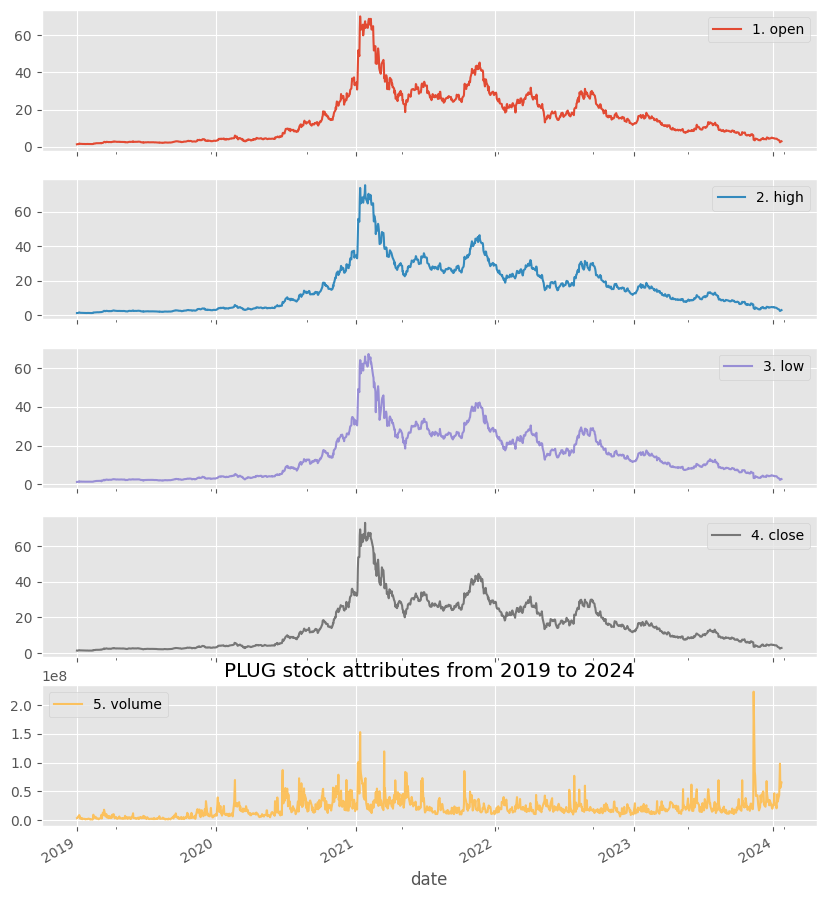

In [161]:
stock_data['PLUG']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('PLUG stock attributes from 2019 to 2024')
plt.show()

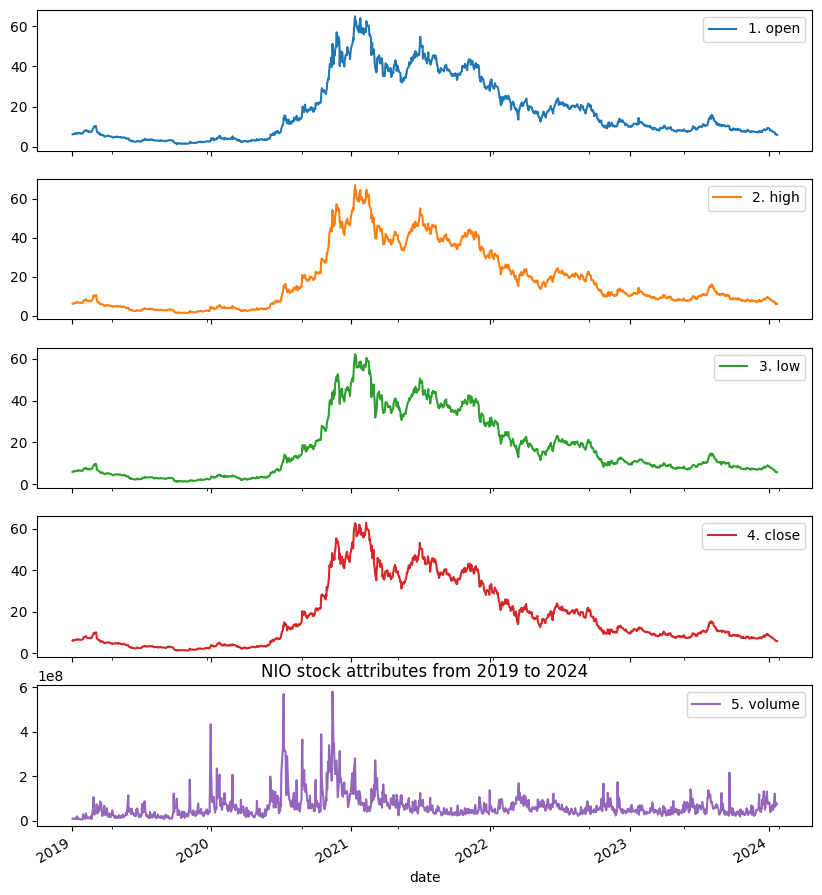

In [105]:
stock_data['NIO']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NIO stock attributes from 2019 to 2024')
plt.show()

In [57]:
stock_data['NIO'].corr()

1. open   2. high    3. low  4. close  5. volume
1. open    1.000000  0.999110  0.998883  0.997833   0.318023
2. high    0.999110  1.000000  0.998696  0.999144   0.334582
3. low     0.998883  0.998696  1.000000  0.998940   0.304088
4. close   0.997833  0.999144  0.998940  1.000000   0.323885
5. volume  0.318023  0.334582  0.304088  0.323885   1.000000

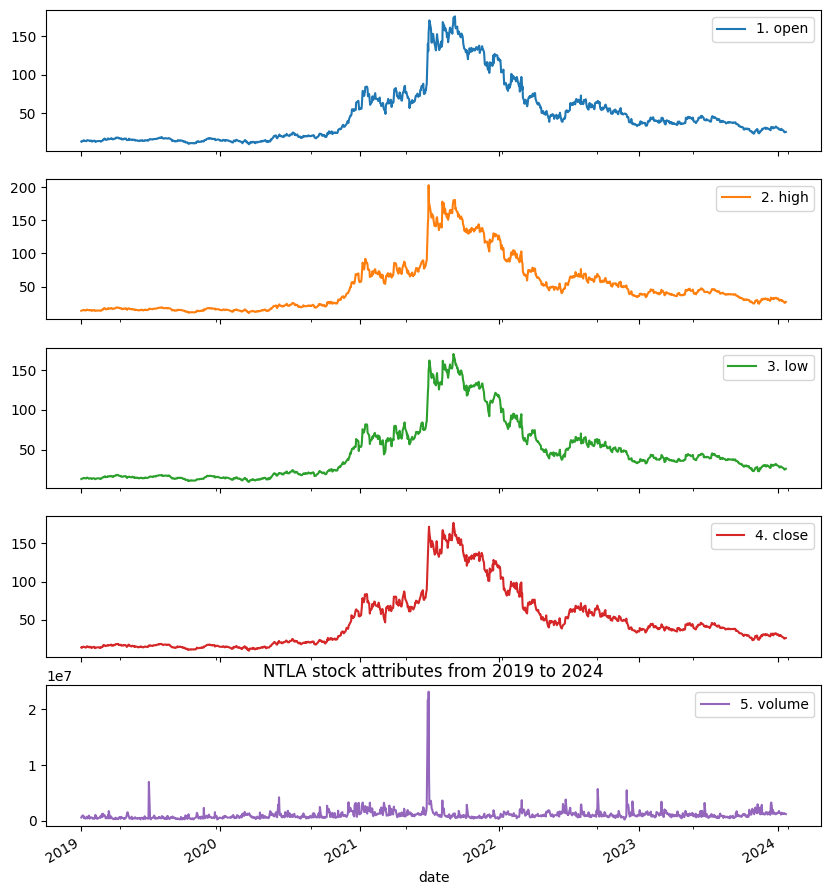

In [104]:
stock_data['NTLA']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('NTLA stock attributes from 2019 to 2024')
plt.show()

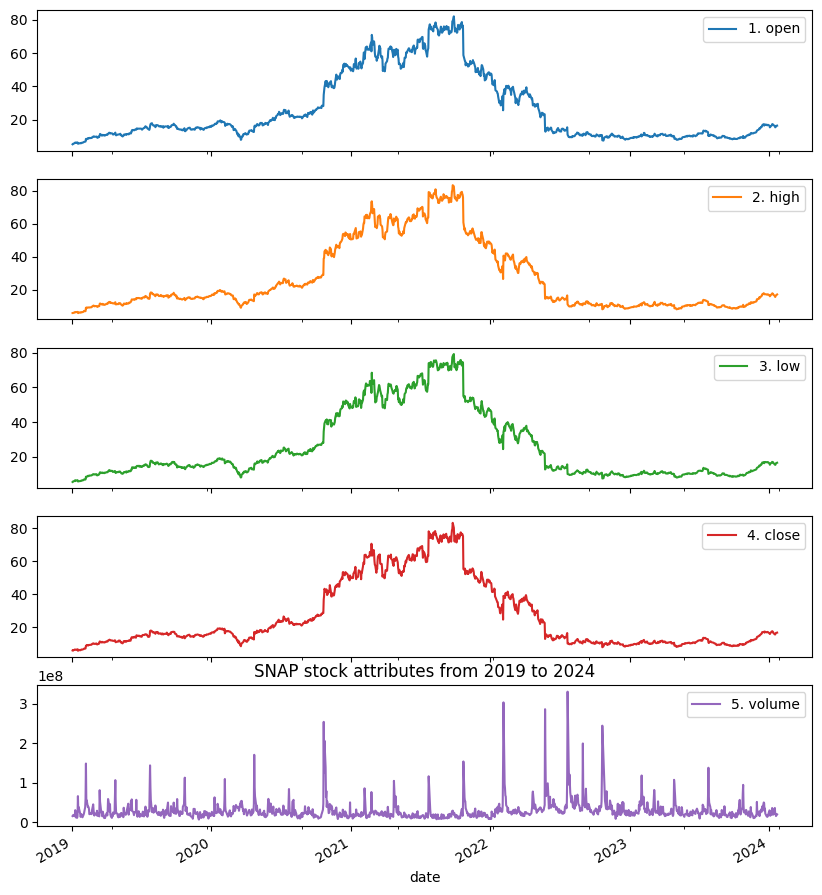

In [103]:
stock_data['SNAP']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('SNAP stock attributes from 2019 to 2024')
plt.show()

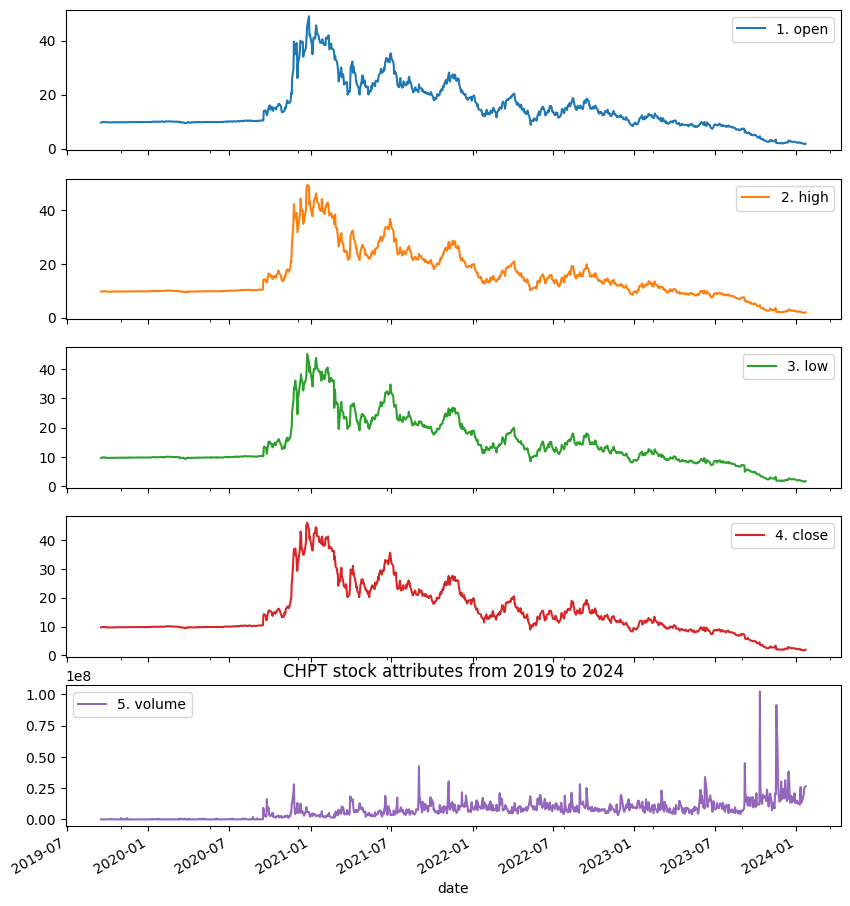

In [102]:
stock_data['CHPT']['2019':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('CHPT stock attributes from 2019 to 2024')
plt.show()

## Plotting our data together prior normalization

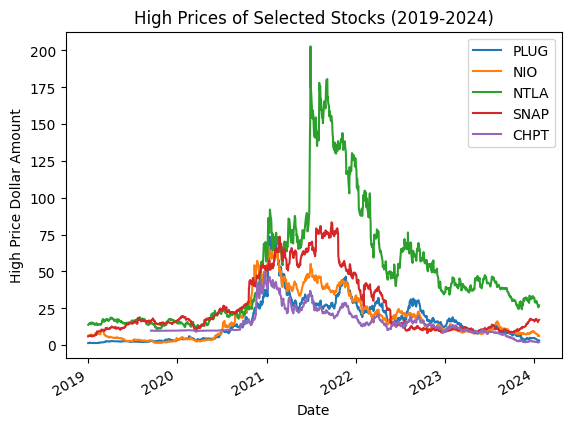

In [108]:
# Plotting before normalization
# symbols_list = ['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT']


stock_data['PLUG']['2019':'2024']['2. high'].plot()
stock_data['NIO']['2019':'2024']['2. high'].plot()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
stock_data['CHPT']['2019':'2024']['2. high'].plot()


# Adding labels and title
plt.title('High Prices of Selected Stocks (2019-2024)')  # Title of the graph
plt.xlabel('Date')  # X-axis label
plt.ylabel('High Price Dollar Amount')  # Y-axis label

# Adding a legend
plt.legend(['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT'])

# Display the plot
plt.show()


## Normalization of Stock Data

In the analysis, we implement a normalization technique known as **Indexing to a Base Value**. This method allows us to compare the performance of different stocks over a common timescale and relative scale. By doing so, we can visualize and compare the relative returns of each stock as if they all started from the same point. Here's how the normalization is applied:

- We begin by selecting the daily high prices for each stock within the 2019 to 2024 period.
- Each daily high price is then divided by the first recorded high price of the respective stock at the beginning of 2019 (`iloc[0]`).
- The resulting ratio is multiplied by 100, effectively setting the base value to 100 for each stock.

This approach allows each stock's price series to start at a value of 100, and subsequent prices are adjusted to reflect the percentage change from this initial value. The resulting normalized series is plotted to show the growth trajectory of each stock relative to its starting point, making it straightforward to compare their performances over time.

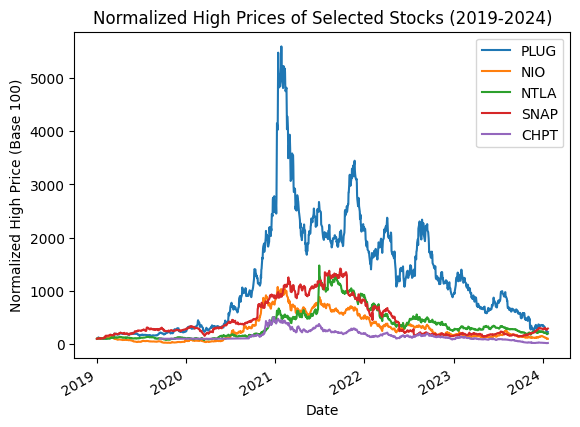

In [109]:
# Normalizing and comparison
# Stocks start from 100

normalized_PLUG = stock_data['PLUG']['2019':'2024']['2. high'].div(stock_data['PLUG']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_NIO = stock_data['NIO']['2019':'2024']['2. high'].div(stock_data['NIO']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_NTLA = stock_data['NTLA']['2019':'2024']['2. high'].div(stock_data['NTLA']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_SNAP = stock_data['SNAP']['2019':'2024']['2. high'].div(stock_data['SNAP']['2019':'2024']['2. high'].iloc[0]).mul(100)
normalized_CHPT = stock_data['CHPT']['2019':'2024']['2. high'].div(stock_data['CHPT']['2019':'2024']['2. high'].iloc[0]).mul(100)

normalized_PLUG.plot()
normalized_NIO.plot()
normalized_NTLA.plot()
normalized_SNAP.plot()
normalized_CHPT.plot()

# Adding labels and title
plt.title('Normalized High Prices of Selected Stocks (2019-2024)')  # Title of the graph
plt.xlabel('Date')  # X-axis label
plt.ylabel('Normalized High Price (Base 100)')  # Y-axis label

# Adding a legend
plt.legend(['PLUG', 'NIO', 'NTLA', 'SNAP', 'CHPT'])

# Display the plot
plt.show()

## Value of Expanding Window Functions in Stock Analysis

The utilization of expanding window functions in the analysis of our stock data provides several benefits that are crucial for financial analysis and trading strategies:

### Trend Identification
- The **expanding mean** offers a visualization of the long-term trend, smoothing out short-term fluctuations to highlight the underlying direction of the stock's movement.

### Volatility Analysis
- The **expanding standard deviation** is indicative of the stock's volatility. An increasing trend suggests rising volatility, while a stable or decreasing trend points to reduced volatility.

### Benchmarking
- Serving as a benchmark, the expanding mean allows analysts to gauge whether the stock is performing above or below its historical average.

### Support and Resistance Levels
- Traders may consider the expanding mean as a dynamic support or resistance level, with the expectation that prices may revert to this mean over time.

### Risk Management
- Volatility analysis is integral to risk management. The expanding standard deviation can inform the setting of stop-loss orders and position sizing to align with an investor's risk tolerance.

### Investment Decisions
- Investors looking for long-term stability and growth can use the expanding mean to assess whether a stock fits their investment profile.

### Valuation Models
- Historical volatility is a key input in valuation models, such as options pricing, where the expanding standard deviation can provide the necessary data.

### Anomaly Detection
- Sudden and significant deviations from the expanding mean or standard deviation can signal anomalies that may require further investigation.

### Market Comparisons
- By normalizing stock data, these expanding metrics can be used to compare different stocks or to benchmark a stock against a market index, providing insights into relative performance.

Incorporating these metrics into stock analysis offers a dynamic and in-depth understanding of a stock's historical performance, informing a wide range of investment and trading decisions.


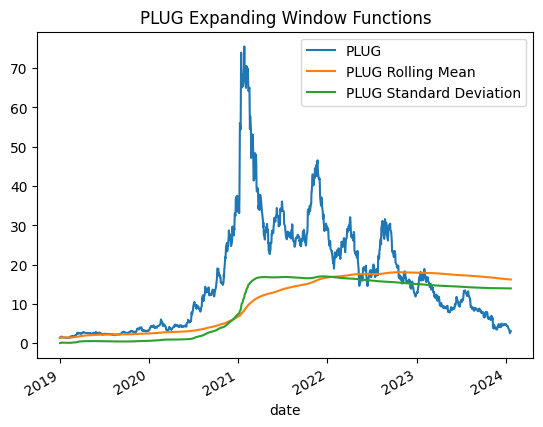

In [110]:
# Expanding Window Functions PLUG

PLUG_expanding_mean = stock_data['PLUG']['2019':'2024']['2. high'].expanding().mean()
PLUG_std = stock_data['PLUG']['2019':'2024']['2. high'].expanding().std()
stock_data['PLUG']['2019':'2024']['2. high'].plot()
PLUG_expanding_mean.plot()
PLUG_std.plot()
plt.title('PLUG Expanding Window Functions')
plt.legend(['PLUG', 'PLUG Rolling Mean', 'PLUG Standard Deviation'])
plt.show()

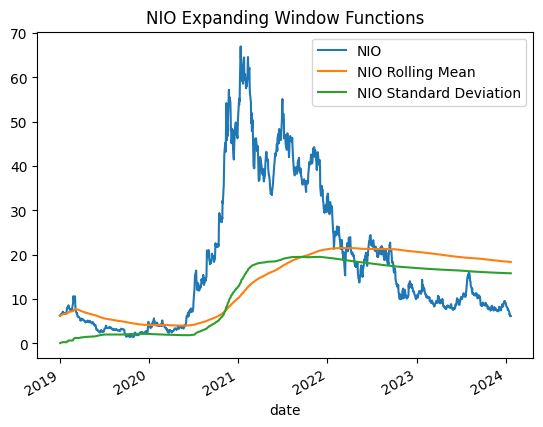

In [111]:
# Expanding Window Functions NIO

NIO_expanding_mean = stock_data['NIO']['2019':'2024']['2. high'].expanding().mean()
NIO_std = stock_data['NIO']['2019':'2024']['2. high'].expanding().std()
stock_data['NIO']['2019':'2024']['2. high'].plot()
NIO_expanding_mean.plot()
NIO_std.plot()
plt.title('NIO Expanding Window Functions')
plt.legend(['NIO', 'NIO Rolling Mean', 'NIO Standard Deviation'])
plt.show()

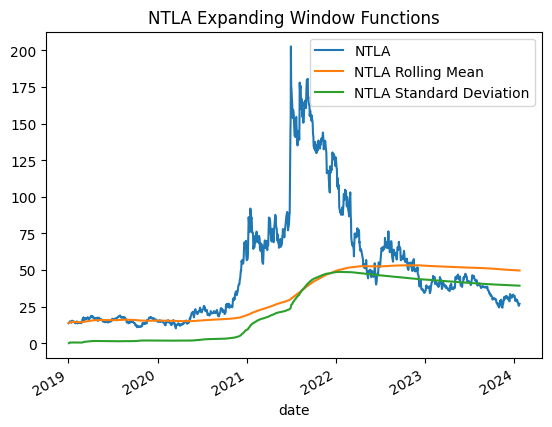

In [112]:
# Expanding Window Functions NTLA

NTLA_expanding_mean = stock_data['NTLA']['2019':'2024']['2. high'].expanding().mean()
NTLA_std = stock_data['NTLA']['2019':'2024']['2. high'].expanding().std()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
NTLA_expanding_mean.plot()
NTLA_std.plot()
plt.title('NTLA Expanding Window Functions')
plt.legend(['NTLA', 'NTLA Rolling Mean', 'NTLA Standard Deviation'])
plt.show()

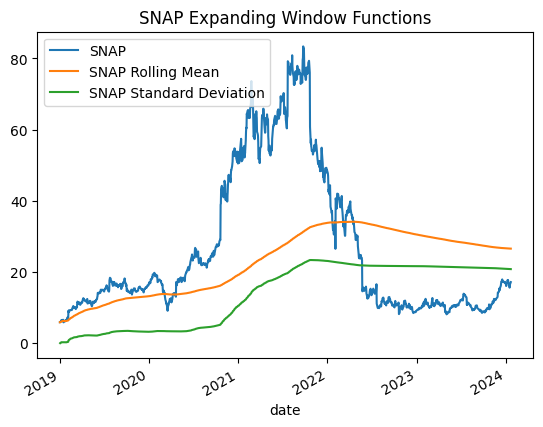

In [113]:
# Expanding Window Functions SNAP

SNAP_expanding_mean = stock_data['SNAP']['2019':'2024']['2. high'].expanding().mean()
SNAP_std = stock_data['SNAP']['2019':'2024']['2. high'].expanding().std()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
SNAP_expanding_mean.plot()
SNAP_std.plot()
plt.title('SNAP Expanding Window Functions')
plt.legend(['SNAP', 'SNAP Rolling Mean', 'SNAP Standard Deviation'])
plt.show()

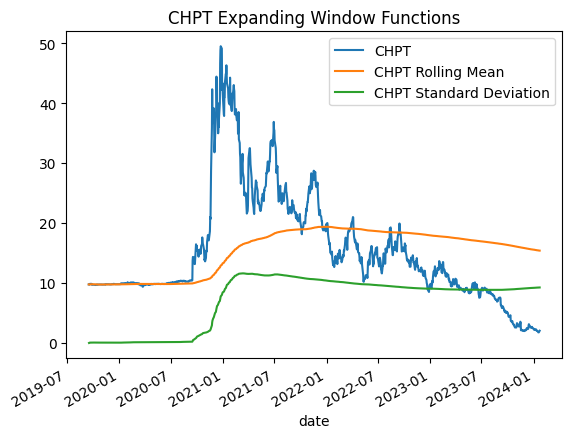

In [114]:
# Expanding Window Functions CHPT

CHPT_expanding_mean = stock_data['CHPT']['2019':'2024']['2. high'].expanding().mean()
CHPT_std = stock_data['CHPT']['2019':'2024']['2. high'].expanding().std()
stock_data['CHPT']['2019':'2024']['2. high'].plot()
CHPT_expanding_mean.plot()
CHPT_std.plot()
plt.title('CHPT Expanding Window Functions')
plt.legend(['CHPT', 'CHPT Rolling Mean', 'CHPT Standard Deviation'])
plt.show()

## Value of Rolling Window Functions in Stock Analysis

Applying rolling window functions to our stocks, like the rolling mean or moving average, to stock data over a specific period, such as 50 days, offers valuable insights for financial analysis and trading strategies:

### Trend Identification
- The **50-day rolling mean** smooths out daily price fluctuations, providing a clearer view of the short-term trend direction without the noise of daily volatility.

### Momentum Indication
- The rolling mean can serve as a momentum indicator. A stock price moving above its 50-day rolling mean may indicate increasing momentum and vice versa.

### Trading Signals
- Crossovers between the stock price and the 50-day rolling mean can be used as trading signals. When the stock price crosses above the rolling mean, it could be a buy signal, while a cross below might suggest a sell signal.

### Support and Resistance Levels
- The 50-day rolling mean may act as a temporary support or resistance level. Prices often bounce off this dynamic line during trends, providing potential entry and exit points.

### Risk Management
- Traders can use the 50-day rolling mean to set trailing stop-loss orders. If the price falls below this level, it could trigger a sale to prevent further losses.

### Indicator of Sentiment
- The position of the stock price relative to the 50-day rolling mean can indicate market sentiment. Prices consistently above this average may reflect bullish sentiment, while prices below may suggest bearish sentiment.

### Technical Analysis
- The rolling mean is a foundational component of various technical analysis indicators and strategies, such as Bollinger Bands and Moving Average Convergence Divergence (MACD).

### Visualization of Price Stability
- By analyzing how tightly the price follows the rolling mean, investors can get a sense of the stock's stability. A tight tracking suggests a stable stock, while wide divergence may indicate instability.

### Comparison with Other Time Frames
- Comparing the 50-day rolling mean with longer time frames, like a 50-day or 200-day moving average, can provide additional context on different market phases (short-term vs. long-term trends).

Implementing the 50-day rolling mean in stock analysis is a powerful method to decipher the market's movements, offering a dynamic view that is more responsive to recent price changes, thus informing a broad array of trading and investment decisions.


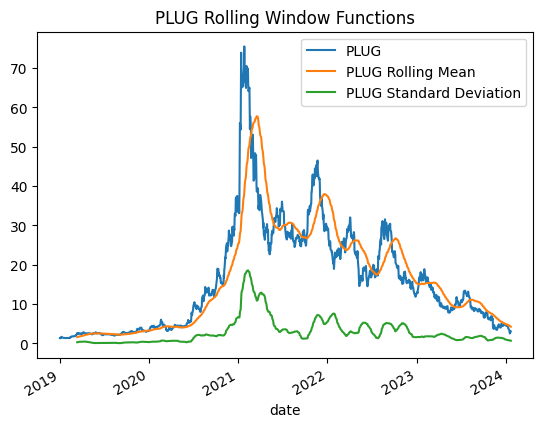

In [124]:
# Rolling Window (50 day) Functions PLUG

PLUG_rolling_mean = stock_data['PLUG']['2019':'2024']['2. high'].rolling(50).mean()
PLUG_rolling_std = stock_data['PLUG']['2019':'2024']['2. high'].rolling(50).std()
stock_data['PLUG']['2019':'2024']['2. high'].plot()
PLUG_rolling_mean.plot()
PLUG_rolling_std.plot()
plt.title('PLUG Rolling Window Functions')
plt.legend(['PLUG', 'PLUG Rolling Mean', 'PLUG Standard Deviation'])
plt.show()

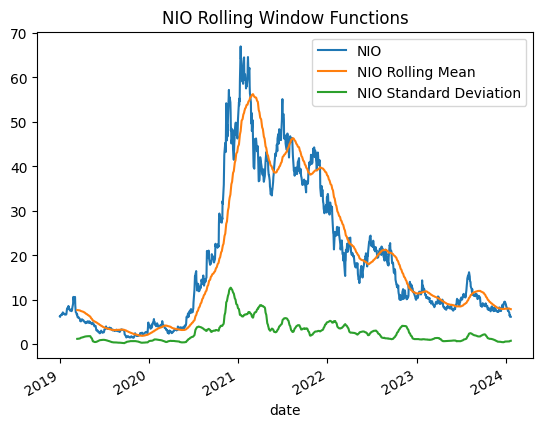

In [125]:
# Rolling Window (50 day) Functions NIO

NIO_rolling_mean = stock_data['NIO']['2019':'2024']['2. high'].rolling(50).mean()
NIO_rolling_std = stock_data['NIO']['2019':'2024']['2. high'].rolling(50).std()
stock_data['NIO']['2019':'2024']['2. high'].plot()
NIO_rolling_mean.plot()
NIO_rolling_std.plot()
plt.title('NIO Rolling Window Functions')
plt.legend(['NIO', 'NIO Rolling Mean', 'NIO Standard Deviation'])
plt.show()

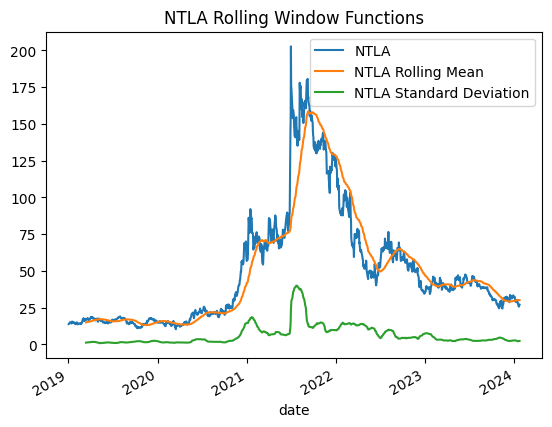

In [126]:
# Rolling Window (50 day) Functions NTLA

NTLA_rolling_mean = stock_data['NTLA']['2019':'2024']['2. high'].rolling(50).mean()
NTLA_rolling_std = stock_data['NTLA']['2019':'2024']['2. high'].rolling(50).std()
stock_data['NTLA']['2019':'2024']['2. high'].plot()
NTLA_rolling_mean.plot()
NTLA_rolling_std.plot()
plt.title('NTLA Rolling Window Functions')
plt.legend(['NTLA', 'NTLA Rolling Mean', 'NTLA Standard Deviation'])
plt.show()

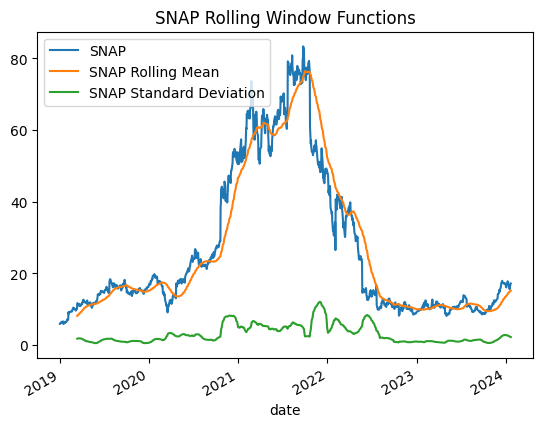

In [127]:
# Rolling Window (50 day) Functions SNAP

SNAP_rolling_mean = stock_data['SNAP']['2019':'2024']['2. high'].rolling(50).mean()
SNAP_rolling_std = stock_data['SNAP']['2019':'2024']['2. high'].rolling(50).std()
stock_data['SNAP']['2019':'2024']['2. high'].plot()
SNAP_rolling_mean.plot()
SNAP_rolling_std.plot()
plt.title('SNAP Rolling Window Functions')
plt.legend(['SNAP', 'SNAP Rolling Mean', 'SNAP Standard Deviation'])
plt.show()


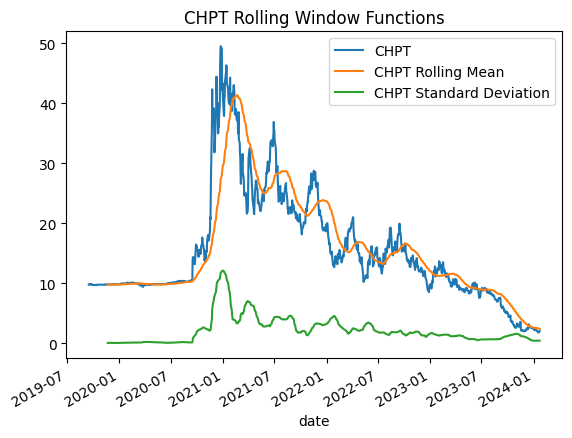

In [128]:
# Rolling Window (50 day) Functions CHPT

CHPT_rolling_mean = stock_data['CHPT']['2019':'2024']['2. high'].rolling(50).mean()
CHPT_rolling_std = stock_data['CHPT']['2019':'2024']['2. high'].rolling(50).std()
stock_data['CHPT']['2019':'2024']['2. high'].plot()
CHPT_rolling_mean.plot()
CHPT_rolling_std.plot()
plt.title('CHPT Rolling Window Functions')
plt.legend(['CHPT', 'CHPT Rolling Mean', 'CHPT Standard Deviation'])
plt.show()

In [129]:
from pylab import rcParams
import statsmodels.api as sm

## Trend and Seasonality

## Decomposition Analysis of PLUG Stock Data

The code snippets below performs a time series decomposition on the 'high' prices of all our stocks from 2019 to 2024. This analysis is essential to understand underlying patterns in the stock price movements. Here's a breakdown of the decomposition and the insights we can gather:

### Code Explanation
- `rcParams['figure.figsize'] = 11, 9`: Sets the size of the plot to 11 inches wide and 9 inches tall for better visibility.
- `decomposed_PLUG = sm.tsa.seasonal_decompose(stock_data['PLUG']['2019':'2024']['2. high'], period=252)`: This line of code utilizes the `seasonal_decompose` function from the `statsmodels` library to decompose the PLUG stock's high prices into three components:
  - Trend
  - Seasonality
  - Residual
  The decomposition uses a period of 252 days, corresponding to the approximate number of trading days in a year, suggesting an annual cycle analysis.
- `figure = decomposed_PLUG.plot()`: Generates a plot of the decomposed time series.
- `plt.show()`: Displays the plot with the decomposed components.

### Insights from the Decomposition

1. **Trend Component**:
   - The trend line smooths out short-term fluctuations and shows the long-term direction of the stock's high prices. An upward trend may indicate a general increase in stock prices over the years, while a downward trend suggests a decline.

2. **Seasonal Component**:
   - This part of the decomposition reveals any regular patterns that repeat annually. For instance, specific times of the year might consistently show higher or lower stock prices, which could be linked to the company's business cycle, market sentiment, or external economic factors.

3. **Residual Component**:
   - The residuals represent the random variations in the stock price that cannot be explained by the trend or seasonality. Analyzing these residuals can help identify unusual events or anomalies that might require further investigation.

By performing this decomposition, we can gain a deeper understanding of the PLUG stock's behavior over time, separating systematic seasonal patterns and long-term trends from random, irregular movements. This information is crucial for investors and analysts in making informed decisions about future investments and understanding the stock's market dynamics.


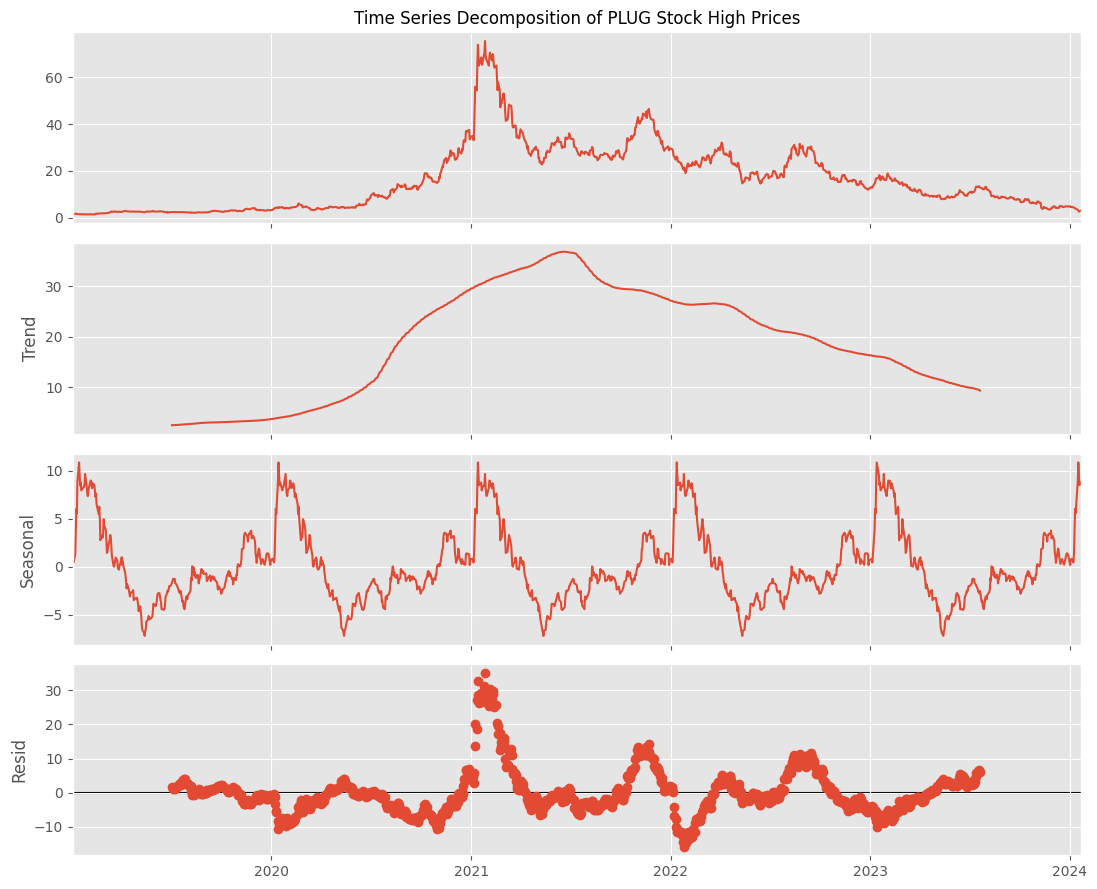

In [177]:
# Decomposition of PLUG

rcParams['figure.figsize'] = 11, 9
decomposed_PLUG = sm.tsa.seasonal_decompose(stock_data['PLUG']['2019':'2024']['2. high'], period=252)
figure = decomposed_PLUG.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of PLUG Stock High Prices', fontsize=12)

plt.show()

## Time Series Decomposition of PLUG Stock High Prices

The attached figure represents the result of a time series decomposition of PLUG stock's high prices from 2019 to 2024. The decomposition separates the data into trend, seasonal, and residual components.

### Observed Data
- The initial plot represents the original observed data, showing significant volatility and a notable peak in early 2021. Following the peak, there's a visible decline, indicating a period of price correction or market adjustment.

### Trend Component
- The trend plot illustrates the long-term progression of the stock's high prices. There's an upward movement culminating in early 2021, signaling a period of growth, after which a downward trend is evident, suggesting a shift in the stock's momentum.

### Seasonal Component
- The seasonal component exhibits the cyclical patterns within the data, repeated over fixed intervals. The consistent amplitude of these cycles points to a stable seasonal influence over the observed time frame.

### Residual Component
- The residuals reflect the irregularities or noise after accounting for trend and seasonality. Around early 2021, the increased variability in residuals could indicate external factors or atypical events influencing stock prices that are not explained by seasonality or trend.

By analyzing these components, we can infer that the stock experienced growth leading up to 2021, followed by a downward adjustment. The seasonal fluctuations could be linked to regular market patterns or company-specific events, while the residuals may highlight anomalies or non-recurring events impacting the stock's performance.

This decomposition is instrumental in understanding the underlying behaviors of the stock's high prices, assisting investors and analysts in making data-driven decisions that account for trend, seasonality, and irregular occurrences in the market.


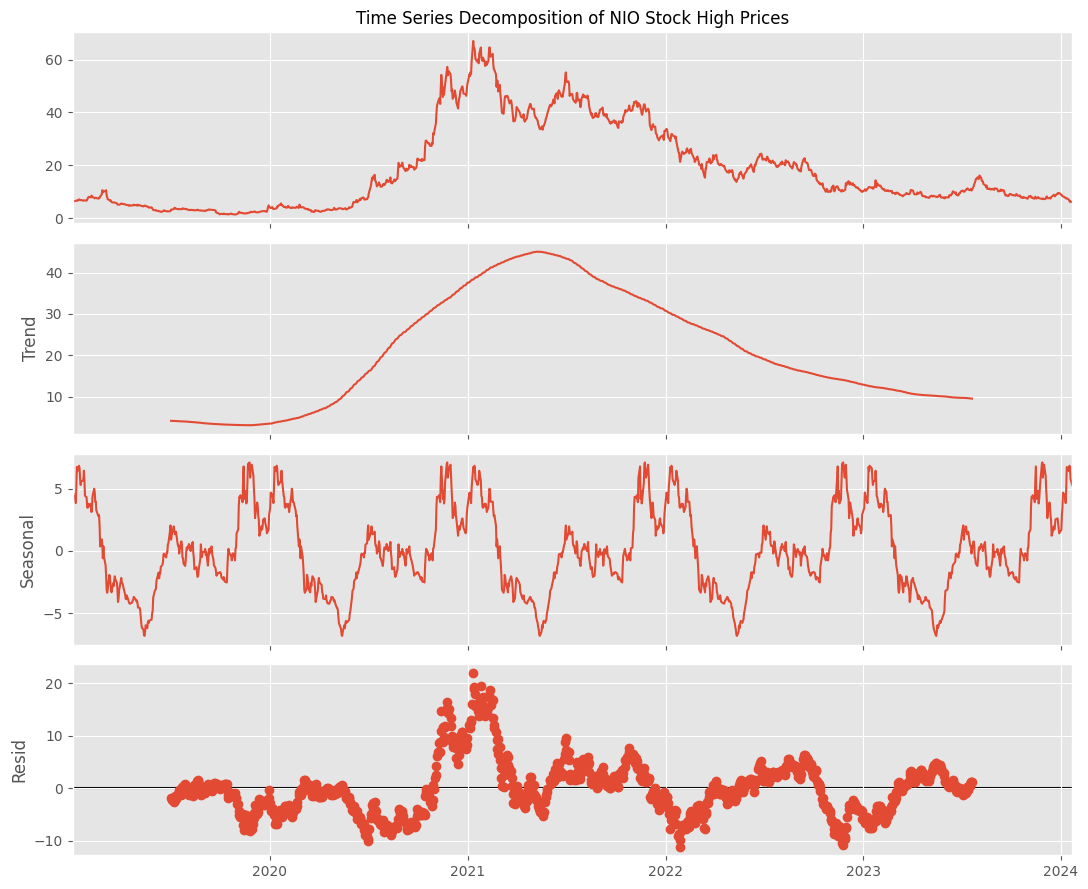

In [178]:
# Decompostion of NIO 

rcParams['figure.figsize'] = 11, 9
decomposed_NIO = sm.tsa.seasonal_decompose(stock_data['NIO']['2019':'2024']['2. high'], period=252)
figure = decomposed_NIO.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of NIO Stock High Prices', fontsize=12)

plt.show()

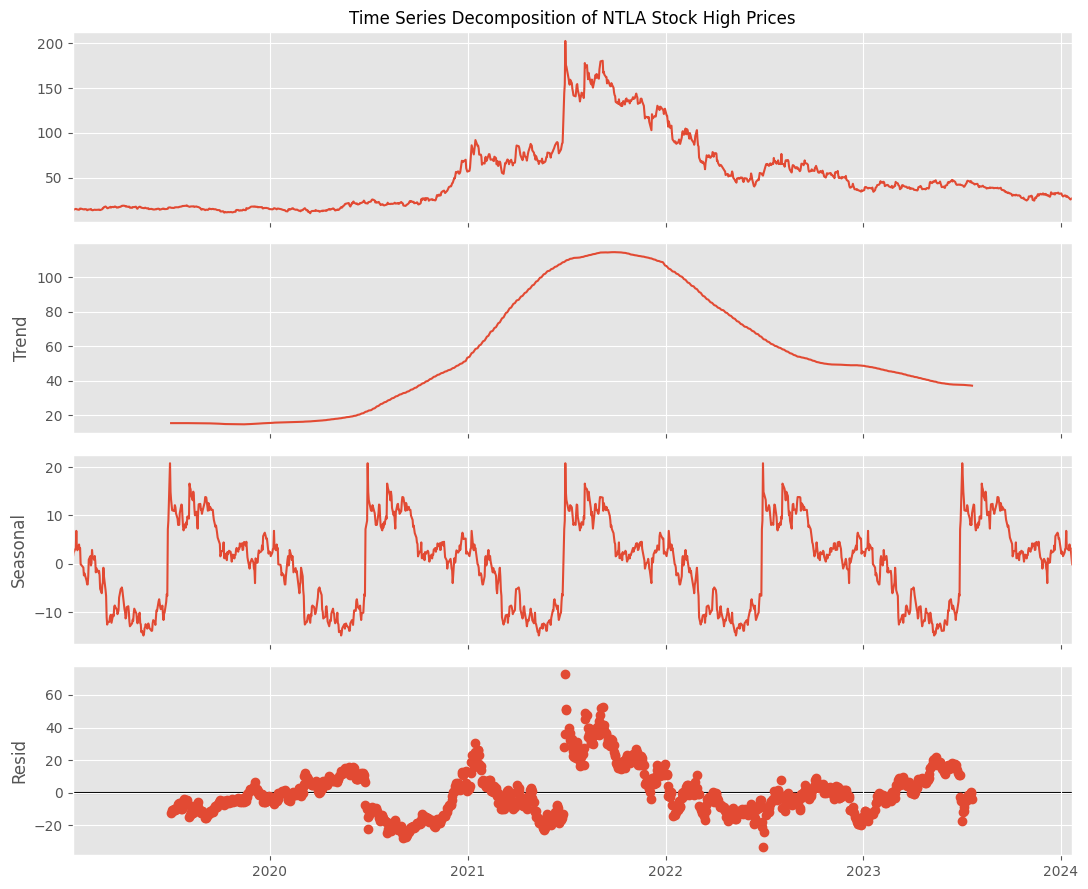

In [179]:
# Decompostion of NTLA

rcParams['figure.figsize'] = 11, 9
decomposed_NTLA = sm.tsa.seasonal_decompose(stock_data['NTLA']['2019':'2024']['2. high'], period=252)
figure = decomposed_NTLA.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of NTLA Stock High Prices', fontsize=12)

plt.show()

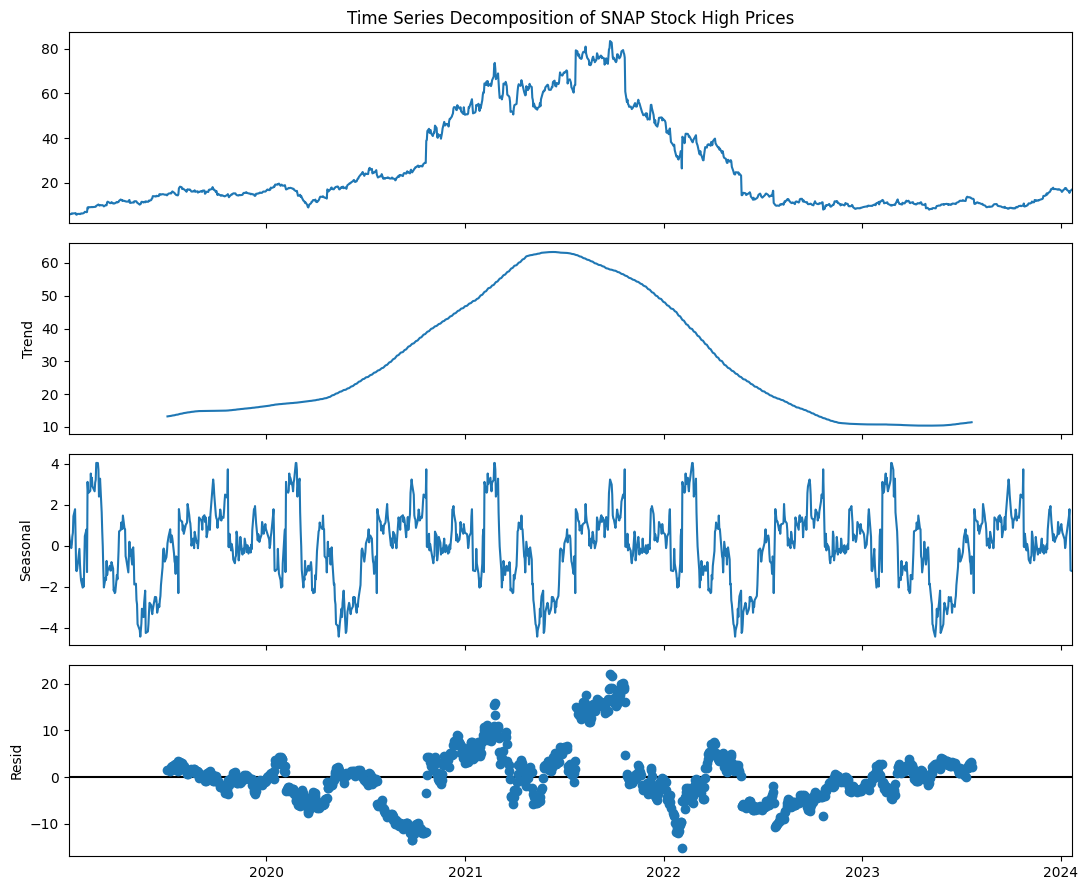

In [156]:
# Decompostion of SNAP

rcParams['figure.figsize'] = 11, 9
decomposed_SNAP = sm.tsa.seasonal_decompose(stock_data['SNAP']['2019':'2024']['2. high'], period=252)
figure = decomposed_SNAP.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of SNAP Stock High Prices', fontsize=12)


plt.show()

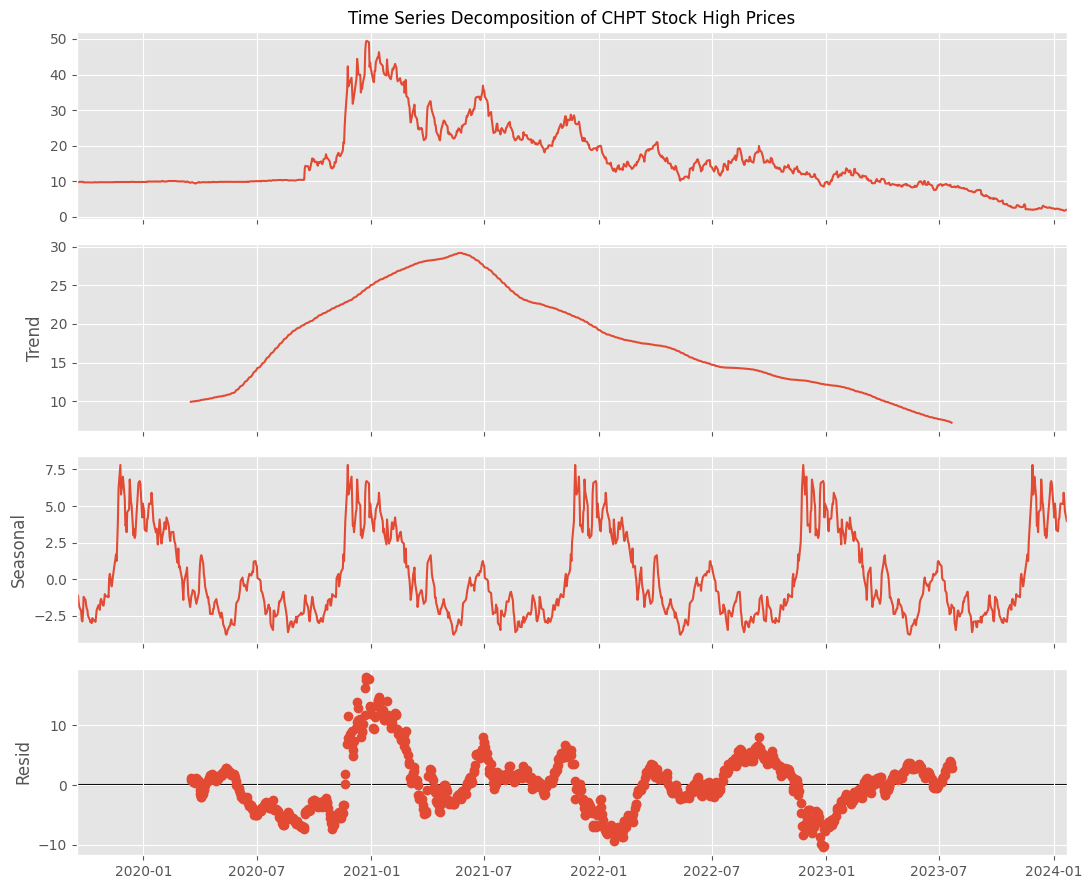

In [181]:
# Decompostion of CHPT

rcParams['figure.figsize'] = 11, 9
decomposed_CHPT = sm.tsa.seasonal_decompose(stock_data['CHPT']['2019':'2024']['2. high'], period=252)
figure = decomposed_CHPT.plot()

axes = figure.axes
axes[0].set_title('Time Series Decomposition of CHPT Stock High Prices', fontsize=12)


plt.show()

## Predictions

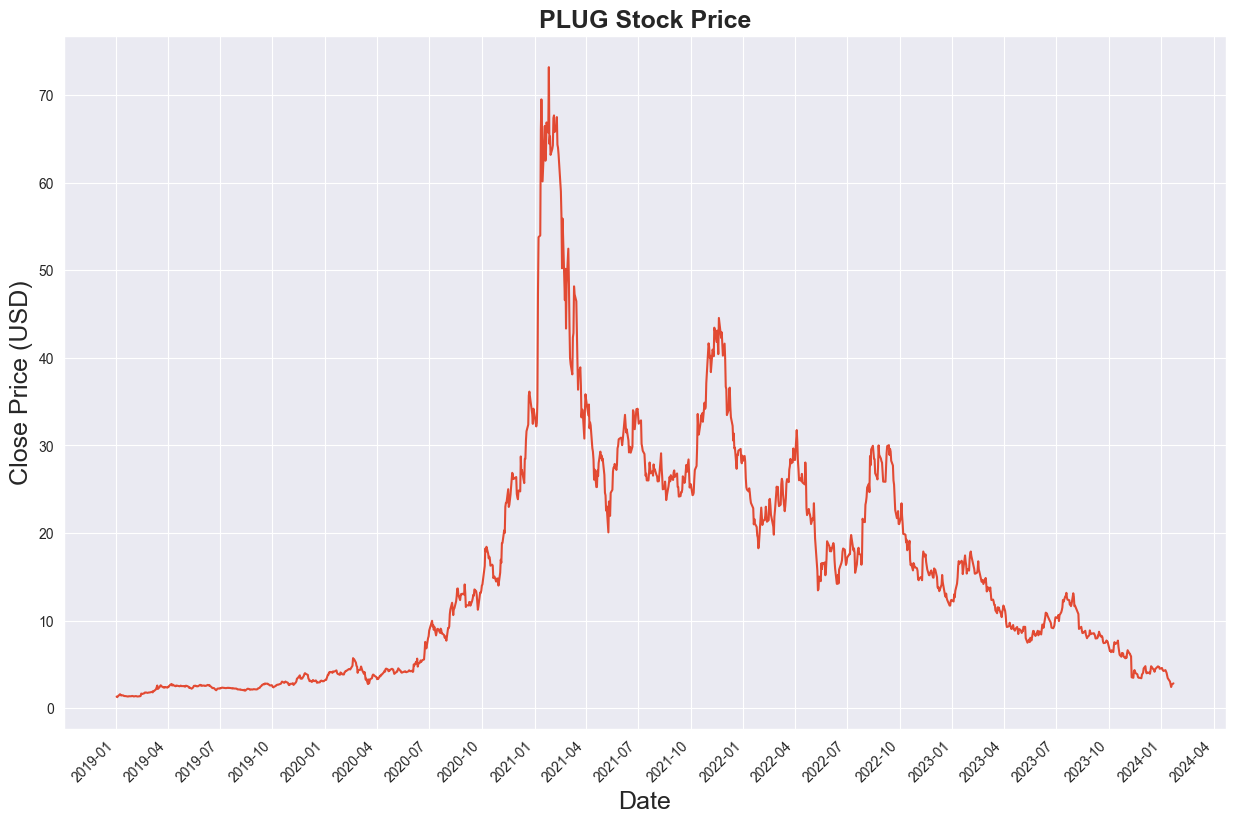

In [202]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(stock_data['PLUG']['2019':'2024']['4. close'])

# Use Matplotlib's date locators and formatters to handle dates on the x-axis
ax = plt.gca()  # Get the current Axes instance

# Set major ticks to the first month of each quarter
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
# Set major tick formatter to a formatter that prints the date as 'year-month'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("PLUG Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


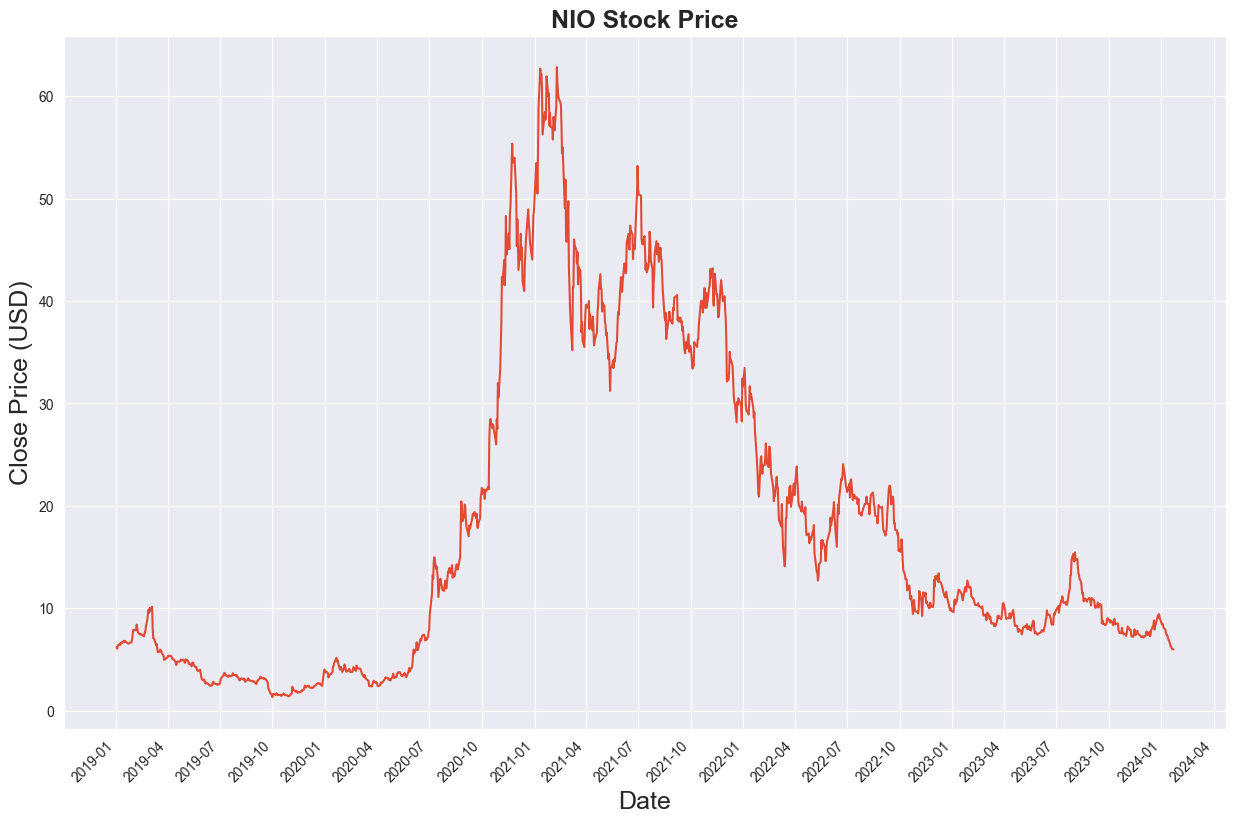

In [203]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(stock_data['NIO']['2019':'2024']['4. close'])

# Use Matplotlib's date locators and formatters to handle dates on the x-axis
ax = plt.gca()  # Get the current Axes instance

# Set major ticks to the first month of each quarter
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
# Set major tick formatter to a formatter that prints the date as 'year-month'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("NIO Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


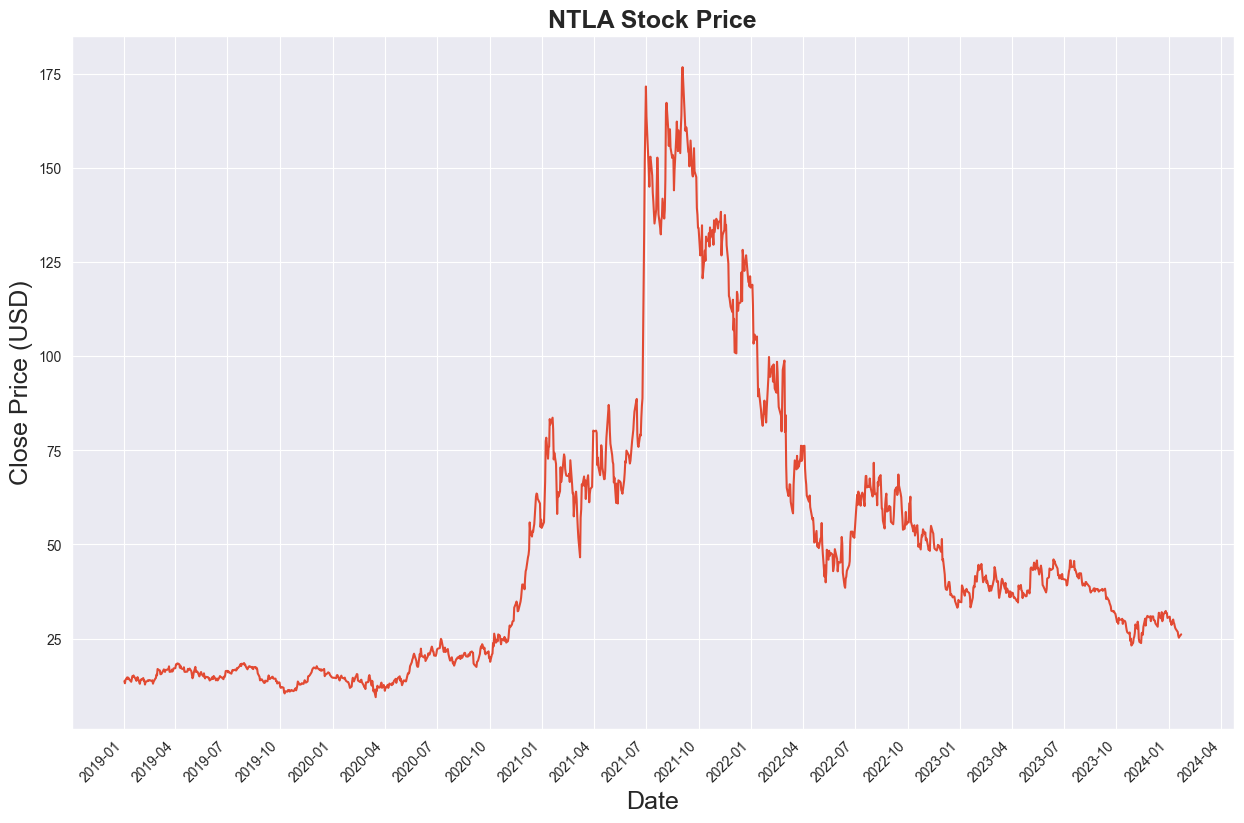

In [204]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(stock_data['NTLA']['2019':'2024']['4. close'])

# Use Matplotlib's date locators and formatters to handle dates on the x-axis
ax = plt.gca()  # Get the current Axes instance

# Set major ticks to the first month of each quarter
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
# Set major tick formatter to a formatter that prints the date as 'year-month'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("NTLA Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


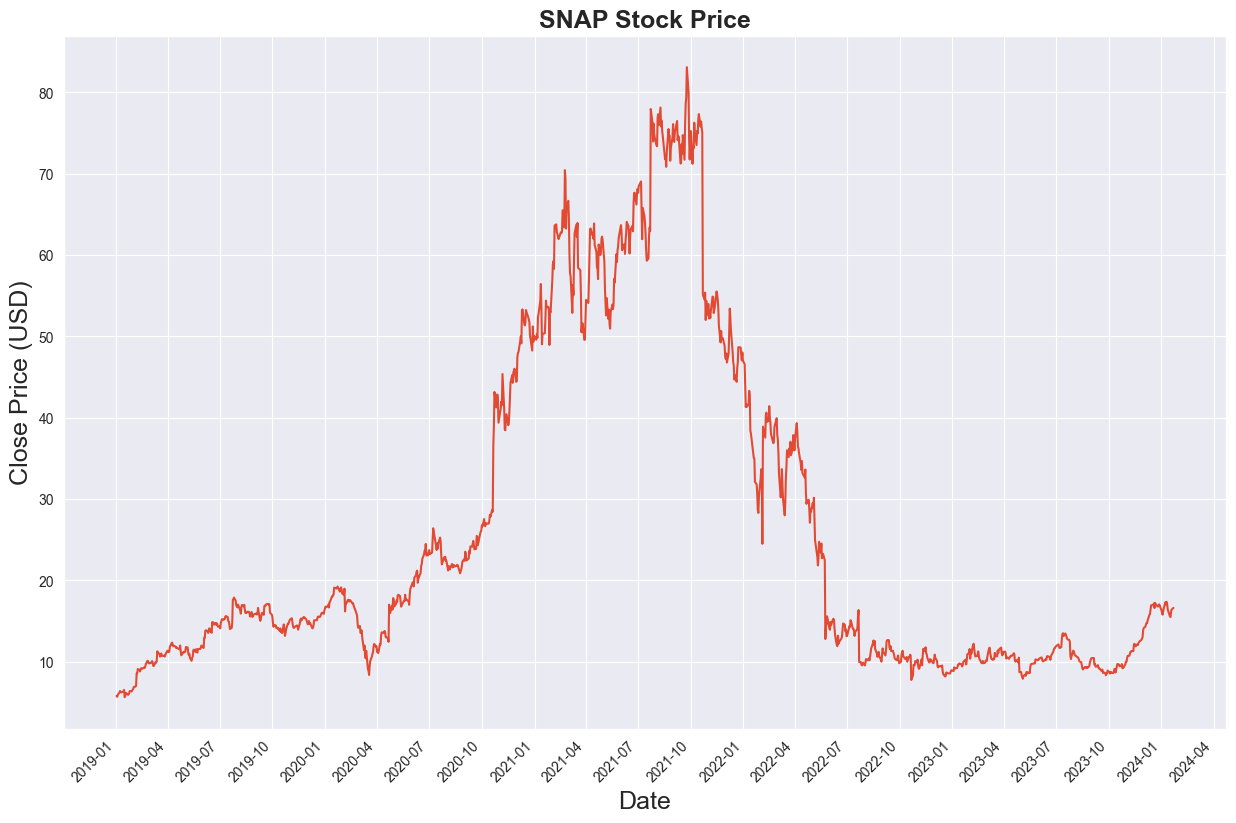

In [205]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(stock_data['SNAP']['2019':'2024']['4. close'])

# Use Matplotlib's date locators and formatters to handle dates on the x-axis
ax = plt.gca()  # Get the current Axes instance

# Set major ticks to the first month of each quarter
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
# Set major tick formatter to a formatter that prints the date as 'year-month'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("SNAP Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


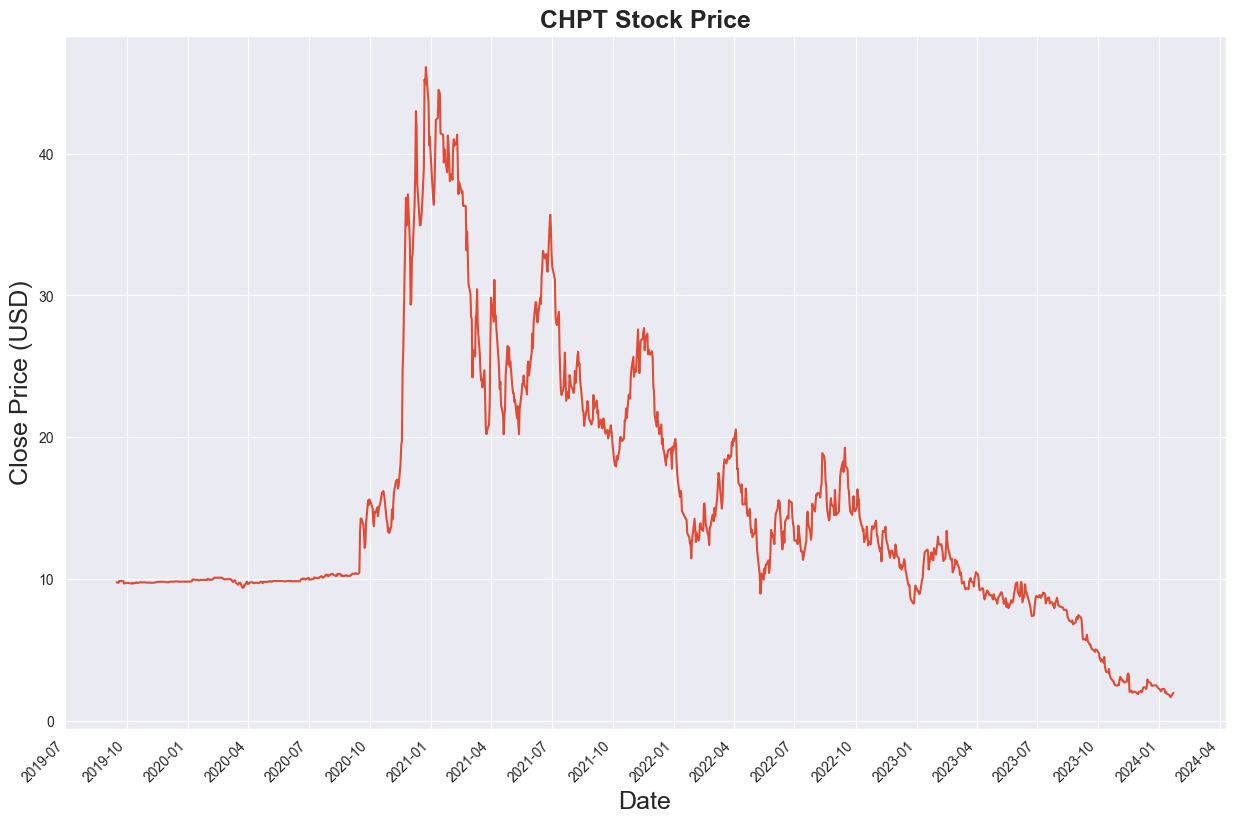

In [206]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(stock_data['CHPT']['2019':'2024']['4. close'])

# Use Matplotlib's date locators and formatters to handle dates on the x-axis
ax = plt.gca()  # Get the current Axes instance

# Set major ticks to the first month of each quarter
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
# Set major tick formatter to a formatter that prints the date as 'year-month'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("CHPT Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


## We start to Normalize or data for training

In [7]:
# Extract the '4. close' column of the PLUG stock from the 'stock_data' dataframe
price_PLUG = stock_data['PLUG']['2019':'2024']['4. close']

# Display information about the 'price_PLUG' series, such as data type and number of non-null values
price_PLUG.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1272 entries, 2019-01-02 to 2024-01-22
Series name: 4. close
Non-Null Count  Dtype  
--------------  -----  
1272 non-null   float64
dtypes: float64(1)
memory usage: 19.9 KB


In [8]:
# Print the 'price_PLUG' series to display the closing prices of PLUG stock
print(price_PLUG)

date
2019-01-02    1.330
2019-01-03    1.260
2019-01-04    1.340
2019-01-07    1.530
2019-01-08    1.600
              ...  
2024-01-16    3.040
2024-01-17    2.735
2024-01-18    2.420
2024-01-19    2.680
2024-01-22    2.840
Name: 4. close, Length: 1272, dtype: float64


In [9]:
# Extract the index from the 'price_PLUG' series, which contains the dates
dates = price_PLUG.index


In [10]:
# Print the extracted dates
print(dates)

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-22'],
              dtype='datetime64[ns]', name='date', length=1272, freq=None)


In [11]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler


# Create an instance of the MinMaxScaler with the feature range set to (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the 'price_PLUG' data, reshaping it to fit the scaler's expected input format and store the scaled values in a new variable
price_PLUG_scaled = scaler.fit_transform(price_PLUG.values.reshape(-1, 1))

In [12]:
# Print the scaled prices to see the transformed data
print(price_PLUG_scaled)

[[-0.99805339]
 [-1.        ]
 [-0.99777531]
 ...
 [-0.96774194]
 [-0.96051168]
 [-0.95606229]]


In [13]:
import pandas as pd

# Create a DataFrame from the scaled prices using the dates from 'price_PLUG' as the index and naming the column 'Scaled Price'
# This operation combines the scaled price data with their corresponding dates in a tabular format
scaled_prices_with_dates = pd.DataFrame(price_PLUG_scaled, index=price_PLUG.index, columns=['Scaled Price'])

# Print the newly created DataFrame to display the scaled prices alongside their dates
print(scaled_prices_with_dates)


            Scaled Price
date                    
2019-01-02     -0.998053
2019-01-03     -1.000000
2019-01-04     -0.997775
2019-01-07     -0.992492
2019-01-08     -0.990545
...                  ...
2024-01-16     -0.950501
2024-01-17     -0.958982
2024-01-18     -0.967742
2024-01-19     -0.960512
2024-01-22     -0.956062

[1272 rows x 1 columns]


In [14]:
# Print the index of the 'scaled_prices_with_dates' DataFrame, which contains the dates
print(scaled_prices_with_dates.index)


DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-22'],
              dtype='datetime64[ns]', name='date', length=1272, freq=None)


In [15]:
# Retrieve and print the specific date at index position 5 from the DataFrame's index, showing how to access individual dates
specific_date = scaled_prices_with_dates.index[5]  # Retrieves the date at position 5
print(specific_date)


2019-01-09 00:00:00


In [16]:
# Print descriptive statistics for the 'scaled_prices_with_dates' DataFrame, providing insights into the distribution of scaled prices

print(scaled_prices_with_dates.describe())

       Scaled Price
count   1272.000000
mean      -0.600114
std        0.373111
min       -1.000000
25%       -0.921301
50%       -0.691185
75%       -0.337875
max        1.000000


## Statistical Summary of Scaled PLUG Stock Prices (2019-2024)

The summary statistics of the scaled PLUG stock prices provide valuable insights into the distribution and variation of the stock prices over the period from 2019 to 2024. Below is a detailed analysis of these statistics:

- **Count**: The dataset contains **1,272 observations**, representing the total number of trading days or time points for which the PLUG stock prices were recorded and subsequently scaled.

- **Mean**: The average value of the scaled prices is approximately **-0.600**. This suggests that on average, the stock prices tend to be below the midpoint of the -1 to 1 scale, indicating a skew towards the lower end of the observed price range before scaling.

- **Standard Deviation (Std)**: With a standard deviation of **0.373**, there is a moderate level of variation or dispersion from the mean. This indicates that while there is variability in the scaled stock prices, it is not extremely high.

- **Minimum (Min)**: The minimum value of the scaled prices is **-1.000**, the lowest possible value on the scale, indicating that at least one trading day saw the stock price at its lowest observed level during the period analyzed.

- **First Quartile (25%)**: At the first quartile, 25% of the scaled prices are **less than or equal to -0.921**, suggesting a significant number of days with prices near the lower end of the observed range before scaling.

- **Median (50%)**: The median scaled price is **-0.691**, meaning that half of the trading days had scaled prices below this value. The median being lower than 0 but higher than the mean suggests a skew towards lower scaled prices.

- **Third Quartile (75%)**: Three quarters of the trading days had scaled prices that are **less than or equal to -0.337**, illustrating the distribution's skew towards lower values within the scaled range.

- **Maximum (Max)**: The maximum scaled price value is **1.000**, the highest possible value on the scale, indicating at least one trading day where the stock price reached the highest observed level during the analyzed period.

In summary, the scaled PLUG stock prices from 2019 to 2024 demonstrate a general skew towards the lower end of the scale, with a significant range between the minimum and maximum values. This analysis highlights the distribution's lean towards lower scaled prices, along with a moderate level of fluctuation as indicated by the standard deviation.


In [17]:
# Retrieve and display the minimum value among the scaled prices, showing the lowest scaled price in the data set
scaled_prices_with_dates['Scaled Price'].values.min()

-1.0

In [41]:
# Print the array of scaled prices without the dates, showing just the transformed price data
scaled_prices_with_dates['Scaled Price'].values

array([-0.99805339, -1.        , -0.99777531, ..., -0.96774194,
       -0.96051168, -0.95606229])

In [18]:
# This command returns only the numerical values from the DataFrame as a NumPy array, excluding the index (dates). 

scaled_prices_with_dates.values

array([[-0.99805339],
       [-1.        ],
       [-0.99777531],
       ...,
       [-0.96774194],
       [-0.96051168],
       [-0.95606229]])

In [19]:
# Convert the DataFrame to a records array including the index
records_with_dates = scaled_prices_with_dates.reset_index().to_records(index=False)

print(records_with_dates)


[('2019-01-02T00:00:00.000000000', -0.99805339)
 ('2019-01-03T00:00:00.000000000', -1.        )
 ('2019-01-04T00:00:00.000000000', -0.99777531) ...
 ('2024-01-18T00:00:00.000000000', -0.96774194)
 ('2024-01-19T00:00:00.000000000', -0.96051168)
 ('2024-01-22T00:00:00.000000000', -0.95606229)]


Min value (after scaling): -1.0
Max value (after scaling): 1.0000000000000002
First few original values:
 date
2019-01-02    1.33
2019-01-03    1.26
2019-01-04    1.34
2019-01-07    1.53
2019-01-08    1.60
Name: 4. close, dtype: float64
First few scaled values:
             Scaled Price
date                    
2019-01-02     -0.998053
2019-01-03     -1.000000
2019-01-04     -0.997775
2019-01-07     -0.992492
2019-01-08     -0.990545


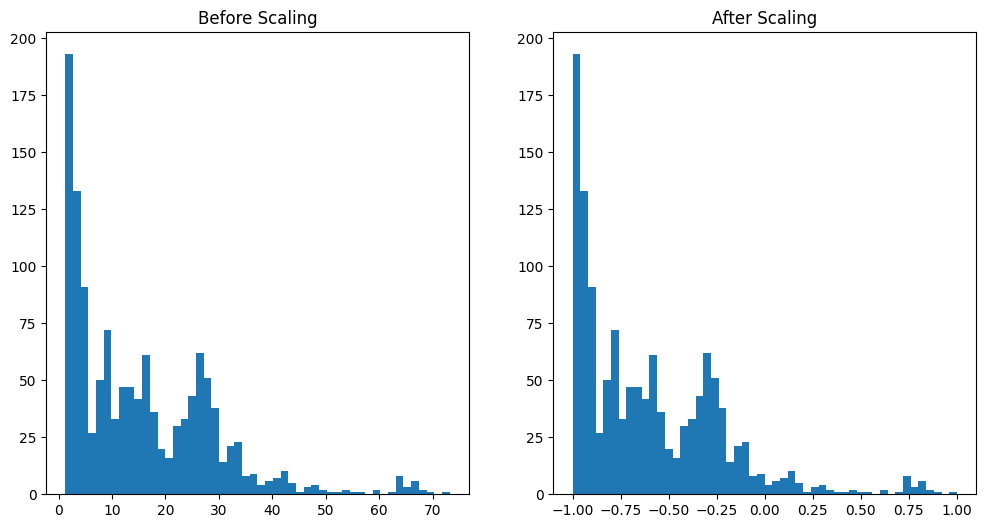

In [22]:
# Import the required libraries: matplotlib for plotting and pandas for data manipulation
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'price_PLUG' contains the original closing prices of the PLUG stock
# and 'scaled_prices_with_dates' is a DataFrame with dates as indexes and scaled prices

# Display the minimum and maximum values of the scaled prices to check the effectiveness of scaling
print("Min value (after scaling):", scaled_prices_with_dates['Scaled Price'].min())
print("Max value (after scaling):", scaled_prices_with_dates['Scaled Price'].max())

# Show the first few entries of the original and scaled data to observe the initial transformation effect
print("First few original values:\n", price_PLUG.head())
print("First few scaled values:\n", scaled_prices_with_dates.head())

# Begin plotting to compare the distribution of original and scaled data
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility

# Plot the distribution of original data using a histogram
plt.subplot(1, 2, 1)  # Prepare a subplot environment with 1 row and 2 columns, this is the first plot
plt.hist(price_PLUG.values, bins=50)  # Plot histogram with 50 bins for better resolution
plt.title("Before Scaling")  # Title to indicate this plot shows the original data distribution

# Plot the distribution of scaled data using a histogram
plt.subplot(1, 2, 2)  # Second plot in the subplot environment
plt.hist(scaled_prices_with_dates['Scaled Price'].values, bins=50)  # Use scaled prices for histogram
plt.title("After Scaling")  # Title to differentiate from the pre-scaling plot

plt.show()  # Display the plots


## Dataset Preparation for Week-Ahead Stock Price Prediction

Given a dataset with 1000 samples, the `split_data_week_ahead` function aims to prepare this dataset for a machine learning model to predict stock prices a week (7 days) ahead, using sequences of historical data defined by the `lookback` period. Here's how the function processes and splits the data, assuming `lookback = 20` and `forecast_horizon = 7`:

### Step 1: Creating Sequences
- The function creates sequences of length `lookback + forecast_horizon`. Each sequence includes 20 days of historical data followed by 7 days leading up to the target day.
- Since each sequence must have a target value 7 days after the last day in the `lookback` period, the loop runs until `len(data_raw) - lookback - forecast_horizon + 1`. This ensures every sequence has enough future data to include the target value.
- For 1000 samples, the maximum index we can start a sequence from is `1000 - 20 - 7 + 1 = 974`. This means the function creates sequences starting from index 0 to index 973.

### Step 2: Splitting Data into Training and Testing Sets
- The data is split into training and testing sets, with 80% used for training and 20% for testing. The `test_set_size` is calculated as `0.2 * total number of sequences`.
- With the formula provided, if we have approximately 974 sequences, `test_set_size` would be `0.2 * 974 ≈ 195` (rounded).
- Thus, `train_set_size` becomes `974 - 195 = 779`. This means the first 779 sequences are used for training, and the remaining 195 sequences are used for testing.

### Step 3: Preparing `x_train`, `y_train`, `x_test`, and `y_test`
- `x_train` and `x_test` are prepared by selecting all but the last 7 days of each sequence for `x` values, effectively using the first 20 days of each sequence as input features.
- `y_train` and `y_test` extract the target value, which is the value 7 days after the last day in the `lookback` period for each sequence. This is achieved by using `-forecast_horizon` to select the target day as the output label.

### Example Output Dimensions
Given these parameters, let's estimate the shapes of the output arrays:
- `x_train.shape`: With 779 training sequences, each containing 20 days of data, and assuming each day's data is represented by a single feature (due to `price_PLUG_scaled` being a 1D array transformed into 2D for the sequences), `x_train` would have a shape of `(779, 20, 1)`.
- `y_train.shape`: Each sequence in `x_train` corresponds to a single target value (the price 7 days later), so `y_train` would have a shape of `(779, 1)`.
- `x_test.shape`: There are 195 testing sequences, so `x_test` would have a shape of `(195, 20, 1)`.
- `y_test.shape`: Similarly, `y_test` would have a shape of `(195, 1)`.

These steps ensure the model learns to predict the stock price 7 days ahead based on the preceding 20 days of data, with separate datasets for training and testing to evaluate its predictive performance.


In [24]:
def split_data_week_ahead(stock, lookback, forecast_horizon):
    """
    Splits the data into training and testing datasets for forecasting a week ahead.

    Parameters:
    - stock: The stock price data.
    - lookback: The number of days to look back for each input sequence.
    - forecast_horizon: Days ahead to forecast, default is 7 days for a week ahead.

    Returns:
    - x_train, y_train, x_test, y_test: Training and testing datasets.
    """
    data_raw = stock if isinstance(stock, np.ndarray) else stock.to_numpy()
    data = []
    
    # Adjust to create sequences with the forecast_horizon
    for index in range(len(data_raw) - lookback - forecast_horizon + 1):
        data.append(data_raw[index: index + lookback + forecast_horizon])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size
    
    # The last value in each sequence is taken as y, considering the forecast_horizon
    x_train = data[:train_set_size, :-forecast_horizon, :]
    y_train = data[:train_set_size, -forecast_horizon, :]
    
    x_test = data[train_set_size:, :-forecast_horizon, :]
    y_test = data[train_set_size:, -forecast_horizon, :]
    
    return x_train, y_train, x_test, y_test


In [27]:
def split_data_week_ahead_with_dates(stock, lookback, forecast_horizon):
    """
    Splits the DataFrame stock price data into training and testing datasets for forecasting a week ahead,
    including the corresponding dates for each sequence.

    Parameters:
    - stock: The stock price DataFrame with a 'Scaled Price' column.
    - lookback: The number of days to look back for each input sequence.
    - forecast_horizon: Days ahead to forecast.

    Returns:
    - x_train, y_train, x_test, y_test: Training and testing datasets.
    - dates_train, dates_test: The corresponding dates for the end of each sequence in the training and testing datasets.
    """
    # Extract scaled prices and dates from the DataFrame
    data_raw = stock['Scaled Price'].values
    dates = stock.index
    
    # Initialize lists to hold the transformed data and the corresponding dates
    data = []
    date_labels = []
    
    # Construct sequences for each lookback period plus the forecast horizon
    for index in range(len(data_raw) - lookback - forecast_horizon + 1):
        # Append the sequence of data for the current index
        data.append(data_raw[index: index + lookback + forecast_horizon])
        # Append the corresponding end date for the sequence
        date_labels.append(dates[index + lookback + forecast_horizon - 1])
    
    # Convert list to NumPy array for efficient manipulation
    data = np.array(data)
    
    # Determine sizes of the training and testing datasets
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size
    
    # Split data into training and testing sets for inputs (x) and outputs (y)
    x_train = data[:train_set_size, :-forecast_horizon]  # Training input sequences
    y_train = data[:train_set_size, -forecast_horizon:]  # Training output (forecasted values)
    x_test = data[train_set_size:, :-forecast_horizon]   # Testing input sequences
    y_test = data[train_set_size:, -forecast_horizon:]    # Testing output (forecasted values)
    
    # Reshape input data to fit the model's expected input shape, adding an extra dimension for features
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
    
    # Split the dates into training and testing sets corresponding to the data splits
    dates_train = date_labels[:train_set_size]
    dates_test = date_labels[train_set_size:]
    
    # Return the prepared datasets and their associated dates
    return x_train, y_train, x_test, y_test, dates_train, dates_test


In [45]:
# Example usage
lookback = 20  # Look back 20 days to predict
forecast_horizon = 7  # Predict 7 days into the future
x_train, y_train, x_test, y_test = split_data_week_ahead(price_PLUG_scaled, lookback, forecast_horizon)

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

NameError: name 'split_data_week_ahead' is not defined

In [30]:
# Demonstrate how to use the 'split_data_week_ahead_with_dates' function to prepare data for time series forecasting.

# Set 'lookback' to 20 days, indicating that each input sequence will use the past 20 days of scaled stock prices to make predictions.
lookback = 20

# Set 'forecast_horizon' to 7 days, defining the prediction window as one week into the future from the last date of each input sequence.
forecast_horizon = 7

# Call the function with the scaled stock price DataFrame, 'lookback', and 'forecast_horizon' parameters.
# This splits the data into training and testing sets for both the input features (x) and the targets (y),
# along with the corresponding dates for the end of each sequence in both sets.
x_train, y_train, x_test, y_test, dates_train, dates_test = split_data_week_ahead_with_dates(scaled_prices_with_dates, lookback, forecast_horizon)

# Print the shapes of the returned datasets to verify their dimensions and ensure they are correctly structured for model training and evaluation.
# 'x_train.shape' and 'x_test.shape' should reflect the number of sequences, the lookback period, and the dimensionality of the data (1 in this case, as we're dealing with univariate time series).
# 'y_train.shape' and 'y_test.shape' indicate the number of sequences and the forecast horizon, showing how many days ahead each sequence is aiming to predict.
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')


x_train.shape = (997, 20, 1)
y_train.shape = (997, 7)
x_test.shape = (249, 20, 1)
y_test.shape = (249, 7)


In [39]:
# Print the first date from 'dates_train', which corresponds to the ending date of the first input sequence in the training dataset.
# This showcases how to access specific dates related to the training sequences.
print(dates_train[0])

2019-02-08 00:00:00


In [38]:
# Assuming 'scaled_prices_with_dates' is a DataFrame structured with a DatetimeIndex,
# and 'dates_train[0]' represents the ending date of the first sequence in 'x_train'.
# This part of the code aims to backtrack from this ending date to identify the corresponding starting date of this sequence in the original data.

# Find the index position of this ending date within the DataFrame's index to locate where the sequence ends in the original dataset.
ending_date_index = scaled_prices_with_dates.index.get_loc(dates_train[0])

# Calculate the index for the starting date of the sequence. The calculation ensures it doesn't fall below 0,
# accounting for the lookback period and forecast horizon to find the sequence's actual start.
starting_date_index = max(0, ending_date_index - lookback - forecast_horizon + 1)

# Retrieve the actual starting date using the calculated index, which identifies the first day of data used in the sequence.
starting_date = scaled_prices_with_dates.index[starting_date_index]

# Construct the list of dates corresponding to the entire sequence by slicing the DataFrame's index
# from the starting date index to the ending date index, inclusive.
# This list represents all the trading days covered by the first sequence.
sequence_dates = scaled_prices_with_dates.index[starting_date_index:ending_date_index + 1]

# Print each date in the sequence to provide a clear view of the time span and specific trading days the sequence covers.
print("Trading dates for the first sequence:")
for date in sequence_dates:
    print(date)

Trading dates for the first sequence:
2019-01-02 00:00:00
2019-01-03 00:00:00
2019-01-04 00:00:00
2019-01-07 00:00:00
2019-01-08 00:00:00
2019-01-09 00:00:00
2019-01-10 00:00:00
2019-01-11 00:00:00
2019-01-14 00:00:00
2019-01-15 00:00:00
2019-01-16 00:00:00
2019-01-17 00:00:00
2019-01-18 00:00:00
2019-01-22 00:00:00
2019-01-23 00:00:00
2019-01-24 00:00:00
2019-01-25 00:00:00
2019-01-28 00:00:00
2019-01-29 00:00:00
2019-01-30 00:00:00
2019-01-31 00:00:00
2019-02-01 00:00:00
2019-02-04 00:00:00
2019-02-05 00:00:00
2019-02-06 00:00:00
2019-02-07 00:00:00
2019-02-08 00:00:00


## Dataset Structure for Time Series Forecasting

The shapes of `x_train`, `y_train`, `x_test`, and `y_test` provide detailed insights into the dataset's structure prepared for training and testing in a machine learning model, specifically tailored for a time series forecasting task. Below is a breakdown of what each shape represents:

### Training Dataset

- **`x_train.shape = (997, 20, 1)`**
  - **997 training samples**: This dataset comprises 997 sequences, each intended for training the model.
  - **20 time steps per sample**: Corresponds to the `lookback` period, indicating that each input sequence spans 20 days of historical data.
  - **1 feature per time step**: Suggests that each day is represented by a single feature, such as the daily closing price of a stock, which the model uses to learn and make predictions.

The structure implies that the model is designed to learn from sequences of 20 consecutive days to predict future values, leveraging a single feature (likely the stock's closing price) from each day.

- **`y_train.shape = (997, 1)`**
  - **997 target values**: Matches the number of training samples, ensuring each sequence has a corresponding prediction target.
  - **Single-value target**: Indicates the prediction task is focused on forecasting a single outcome (e.g., the stock price) 7 days into the future from the last day of each 20-day input sequence.

This confirms the model's objective: to predict the outcome 7 days ahead for each 20-day sequence presented during training.

### Testing Dataset

- **`x_test.shape = (249, 20, 1)`**
  - **249 testing samples**: The model's performance will be evaluated on these separate sequences.
  - **Identical sequence structure**: Like the training set, each testing sequence consists of 20 time steps with 1 feature per step, ensuring consistency in how the model applies its learned patterns to make predictions.

- **`y_test.shape = (249, 1)`**
  - **249 target values for testing**: Each testing sequence has a corresponding target, aligning with the training set's structure.
  - **Forecasting 7 days ahead**: Mirrors the training target setup, focusing on predicting the stock price (or a similar outcome) for a single day, 7 days into the future from each sequence.

### Summary

The dataset is meticulously divided into training and testing sets, with 997 sequences allocated for training and 249 for testing. Each sequence leverages 20 days of historical data to forecast a single outcome, ensuring the model is trained and evaluated on its ability to predict future values based on a fixed historical window. The singular feature dimension likely represents a specific data aspect, such as the daily closing price, which is critical for time series forecasting models. This structured approach facilitates learning from historical data to predict future values (e.g., stock prices 7 days ahead), allowing the model to be assessed on unseen data to gauge its predictive generalization capabilities.


In [ ]:
# The below is an example on how we can extract targets from 4 to 7 days ahead

import torch
import torch.nn as nn

# Convert the training and testing input datasets from NumPy arrays to PyTorch tensors.
x_train_gru = torch.from_numpy(x_train).type(torch.Tensor)
x_test_gru = torch.from_numpy(x_test).type(torch.Tensor)

# Extract the specific target days from the training and testing datasets.
# Assuming 'y_train' and 'y_test' have shapes (n_sequences, 7), where each row is a sequence
# and columns represent days ahead, we select the fourth, fifth, sixth, and seventh days for our target datasets.

# Extract the targets for the fourth day
y_train_fourth_day = y_train[:, 3]  # 0-based indexing, 3 corresponds to the fourth day
y_test_fourth_day = y_test[:, 3]

# Extract the targets for the fifth day
y_train_fifth_day = y_train[:, 4]  # 0-based indexing, 4 corresponds to the fifth day
y_test_fifth_day = y_test[:, 4]

# Extract the targets for the sixth day
y_train_sixth_day = y_train[:, 5]  # 0-based indexing, 5 corresponds to the sixth day
y_test_sixth_day = y_test[:, 5]

# Extract the targets for the seventh day
y_train_seventh_day = y_train[:, 6]  # 0-based indexing, 6 corresponds to the seventh day
y_test_seventh_day = y_test[:, 6]

# Convert the modified training and testing target datasets for each specific day from NumPy arrays to PyTorch tensors.
y_train_gru_fourth_day = torch.from_numpy(y_train_fourth_day).type(torch.Tensor)
y_test_gru_fourth_day = torch.from_numpy(y_test_fourth_day).type(torch.Tensor)

y_train_gru_fifth_day = torch.from_numpy(y_train_fifth_day).type(torch.Tensor)
y_test_gru_fifth_day = torch.from_numpy(y_test_fifth_day).type(torch.Tensor)

y_train_gru_sixth_day = torch.from_numpy(y_train_sixth_day).type(torch.Tensor)
y_test_gru_sixth_day = torch.from_numpy(y_test_sixth_day).type(torch.Tensor)

y_train_gru_seventh_day = torch.from_numpy(y_train_seventh_day).type(torch.Tensor)
y_test_gru_seventh_day = torch.from_numpy(y_test_seventh_day).type(torch.Tensor)


In [56]:
# Import necessary libraries from PyTorch for neural network construction and operations
import torch
import torch.nn as nn

# Convert the training and testing input datasets (x_train and x_test) from NumPy arrays to PyTorch tensors.
# This conversion is necessary because PyTorch models require inputs to be in the form of tensors.
# The '.type(torch.Tensor)' ensures the data type is set to the default tensor type, suitable for model input.
x_train_gru = torch.from_numpy(x_train).type(torch.Tensor)
x_test_gru = torch.from_numpy(x_test).type(torch.Tensor)

# Similarly, convert the training and testing target datasets (y_train and y_test) from NumPy arrays to PyTorch tensors,
# allowing these datasets to be used as labels in the training and evaluation of the PyTorch model.
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


# Training Parameters for RNN Model

The training parameters listed are typical hyperparameters for a Recurrent Neural Network (RNN) model. The appropriateness of these parameters depends on the specific details the dataset and the problem at hand.

## Parameters Breakdown

1. **Input Dimension (`input_dim`)**:
   - `input_dim = 1`
   - Indicates the number of input features per time step.
   - For a single feature like closing stock price, this is set to 1.

2. **Hidden Dimension (`hidden_dim`)**:
   - `hidden_dim = 32`
   - Represents the size of the hidden state in the RNN.
   - Larger `hidden_dim` can capture more complex patterns but increases computational load and overfitting risk.

3. **Number of Layers (`num_layers`)**:
   - `num_layers = 2`
   - Indicates two stacked RNN layers.
   - More layers can help learn complex patterns but increase model complexity and overfitting risk.

4. **Output Dimension (`output_dim`)**:
   - `output_dim = 1`
   - Dimensionality of the output, typically 1 for predicting a single continuous value.

5. **Number of Epochs (`num_epochs`)**:
   - `num_epochs = 105`
   - Number of times the entire training dataset passes through the network.
   - Requires monitoring for overfitting or underfitting.

## Considerations

- **Overfitting vs. Underfitting**: Monitor training and validation loss. Overfitting is indicated by decreasing training loss and increasing validation loss. Use regularization techniques like dropout to mitigate.
- **Experimentation**: Adjust hyperparameters based on model performance during training.
- **Validation**: Use a validation set to monitor performance on unseen data and help tune hyperparameters.

In summary, these parameters are a reasonable starting point, but they may need to be adjusted based on the model's performance during training.


In [59]:
# Define the dimensions and configuration for a neural network model, specifically for a time series forecasting task.

# input_dim: Specifies the number of input features per timestep in the input sequence. 
# For univariate time series forecasting (predicting one variable using itself), this is set to 1.
input_dim = 1

# hidden_dim: Defines the size of the hidden layer(s). Here, 32 units are chosen for the hidden layers, 
# which determines the model's capacity to learn representations from the data.
hidden_dim = 32

# num_layers: Sets the number of recurrent layers in the network. Using 2 layers here suggests a deeper model 
# for capturing more complex patterns in the data.
num_layers = 2

# output_dim: Specifies the number of output features. For seven day forecasting (predicting seven variables),
# this is set to 7.
output_dim = 7

# num_epochs: Indicates the total number of training cycles the model will go through. Setting this to 105 
# epochs means the entire training dataset will be passed forward and backward through the network 105 times.
num_epochs = 105


In [86]:
import torch
import torch.nn as nn

class GRU(nn.Module):
    """
    GRU Neural Network for time series forecasting.
    
    Attributes:
    - input_dim: The number of input features per timestep.
    - hidden_dim: The number of features in the hidden state h.
    - num_layers: The number of stacked GRU layers.
    - output_dim: The number of output features (forecast horizon).
    """
    
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        """
        Initializes the GRU model with the specified parameters and layers.
        
        Parameters:
        - input_dim (int): Number of input features.
        - hidden_dim (int): Size of GRU hidden layers.
        - num_layers (int): Number of GRU layers.
        - output_dim (int): Number of output features.
        """
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim  # Size of the hidden layer
        self.num_layers = num_layers  # Number of GRU layers
        
        # The GRU layer; batch_first=True means the input tensors will be of shape (batch_size, seq_length, features)
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        # Fully connected layer that maps the GRU layer output to the desired output_dim
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Defines the forward pass of the model.
        
        Parameters:
        - x (Tensor): The input sequence to the GRU model.
        
        Returns:
        - Tensor: The output of the model.
        """
        # Initialize hidden state with zeros
        # Shape: (num_layers, batch_size, hidden_dim)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        # Forward propagate the GRU
        # out: tensor containing the output features (h_t) from the last layer of the GRU, for each t.
        out, (hn) = self.gru(x, (h0.detach()))  # detach h0 to prevent backprop through the initial hidden state
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :]) 
        return out


In [88]:
# Instantiate the GRU model with specified architecture parameters.
# input_dim: Number of features per timestep in the input sequence.
# hidden_dim: Size of the hidden layers within GRU cells.
# output_dim: Number of output features (e.g., forecasted values).
# num_layers: Number of recurrent layers in the GRU.
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Define the loss function for the model's output. The Mean Squared Error (MSE) Loss is used here,
# which is common for regression problems, including time series forecasting.
# 'reduction=mean' specifies that the losses are averaged over all observations for each minibatch.
criterion = torch.nn.MSELoss(reduction='mean')

# Choose the Adam optimizer for updating model parameters. Adam is an adaptive learning rate optimization algorithm
# designed to handle sparse gradients on noisy problems, making it suitable for many types of neural network training.
# lr=0.01 sets the initial learning rate, determining the step size at each iteration while moving toward a minimum of the loss function.
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)


In [89]:
import time  # Import the time module to track the duration of the training process.

# Initialize an array to record the loss at each epoch.
hist = np.zeros(num_epochs)

# Record the start time to calculate the total training duration.
start_time = time.time()

# This list 'gru' appears unused in the provided snippet. 
# If it's intended for storing model states or outputs at each epoch, consider adding relevant code or removing the declaration.
gru = []

# Begin training over the specified number of epochs.
for t in range(num_epochs):
    # Forward pass: Compute the predicted y by passing x to the model.
    y_train_pred = model(x_train_gru)

    # Compute and print the loss using the Mean Squared Error between predicted and actual y values in the training set.
    loss = criterion(y_train_pred, y_train_gru)
    print(f"Epoch {t} MSE: {loss.item()}")
    hist[t] = loss.item()  # Store the loss in 'hist' for later analysis or plotting.

    # Zero the gradients before running the backward pass.
    optimiser.zero_grad()
    
    # Backward pass: Compute the gradient of the loss with respect to model parameters.
    loss.backward()
    
    # Perform a single optimization step (parameter update).
    optimiser.step()

# Calculate and print the total training time.
training_time = time.time() - start_time    
print(f"Training time: {training_time}")


Epoch 0 MSE: 0.49912944436073303
Epoch 1 MSE: 0.37733396887779236
Epoch 2 MSE: 0.27157533168792725
Epoch 3 MSE: 0.1658380627632141
Epoch 4 MSE: 0.14957383275032043
Epoch 5 MSE: 0.1644696742296219
Epoch 6 MSE: 0.11513639986515045
Epoch 7 MSE: 0.0933554396033287
Epoch 8 MSE: 0.09386780112981796
Epoch 9 MSE: 0.08089271932840347
Epoch 10 MSE: 0.05156305804848671
Epoch 11 MSE: 0.030603360384702682
Epoch 12 MSE: 0.03622390702366829
Epoch 13 MSE: 0.032421328127384186
Epoch 14 MSE: 0.025926146656274796
Epoch 15 MSE: 0.032197292894124985
Epoch 16 MSE: 0.024824628606438637
Epoch 17 MSE: 0.014340836554765701
Epoch 18 MSE: 0.01338006742298603
Epoch 19 MSE: 0.01743895560503006
Epoch 20 MSE: 0.018315916880965233
Epoch 21 MSE: 0.016124572604894638
Epoch 22 MSE: 0.014634153805673122
Epoch 23 MSE: 0.01462630182504654
Epoch 24 MSE: 0.014354714192450047
Epoch 25 MSE: 0.012792184948921204
Epoch 26 MSE: 0.010874168947339058
Epoch 27 MSE: 0.010112117044627666
Epoch 28 MSE: 0.010479466058313847
Epoch 29 MSE:

In [164]:
# Inverse transform the predictions
# The 'y_train_pred' tensor is first detached from the computation graph and converted to a NumPy array.
# This is necessary because the scaler expects a NumPy array as input. The 'inverse_transform' method of the scaler
# is then used to convert the normalized prediction data back to its original scale, making it interpretable in the
# context of the original data domain. The result is converted to a pandas DataFrame for easy manipulation and analysis.
predict2 = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))

# Inverse transform the original training data
# Similar to the predictions, the 'y_train_gru' tensor is detached and converted to a NumPy array.
# The 'inverse_transform' method is applied to revert the normalized training data back to its original scale.
# This allows for direct comparison between the model's predictions and the actual values in the training set.
# The result is stored in a pandas DataFrame.
original2 = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))


In [148]:
# Assuming you want to create a DataFrame with 7 columns for the 7 days of predictions
columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()), columns=columns)

# Do the same for the actual values if they also contain data for 7 days
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()), columns=columns)


# Since 'dates_train' corresponds to the end date of each input sequence, it should align with the predictions
# Add 'dates_train' as the index to both DataFrames for temporal context
predict.index = pd.to_datetime(dates_train[-len(predict):])  # Use the last part of 'dates_train' that aligns with 'predict'
original.index = pd.to_datetime(dates_train[-len(original):])  # Similarly align 'original' with its corresponding dates

# Now, both 'predict' and 'original' DataFrames have dates as their index, providing clear temporal context


In [147]:
dates_train

[Timestamp('2019-02-08 00:00:00'),
 Timestamp('2019-02-11 00:00:00'),
 Timestamp('2019-02-12 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-02-14 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-02-19 00:00:00'),
 Timestamp('2019-02-20 00:00:00'),
 Timestamp('2019-02-21 00:00:00'),
 Timestamp('2019-02-22 00:00:00'),
 Timestamp('2019-02-25 00:00:00'),
 Timestamp('2019-02-26 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2019-02-28 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-03-04 00:00:00'),
 Timestamp('2019-03-05 00:00:00'),
 Timestamp('2019-03-06 00:00:00'),
 Timestamp('2019-03-07 00:00:00'),
 Timestamp('2019-03-08 00:00:00'),
 Timestamp('2019-03-11 00:00:00'),
 Timestamp('2019-03-12 00:00:00'),
 Timestamp('2019-03-13 00:00:00'),
 Timestamp('2019-03-14 00:00:00'),
 Timestamp('2019-03-15 00:00:00'),
 Timestamp('2019-03-18 00:00:00'),
 Timestamp('2019-03-19 00:00:00'),
 Timestamp('2019-03-20 00:00:00'),
 Timestamp('2019-03-

In [146]:
# Export the 'original' DataFrame to a CSV file
original.to_csv('original_predictions.csv', index=True)


In [144]:
import pandas as pd

# Set the maximum number of rows to display to 100 (or any number you prefer)
pd.set_option('display.max_rows', 100)

# Now, when you print the head with 100 rows, it should display all of them without truncation
print(price_PLUG.head(100))


date
2019-01-02    1.33
2019-01-03    1.26
2019-01-04    1.34
2019-01-07    1.53
2019-01-08    1.60
2019-01-09    1.51
2019-01-10    1.45
2019-01-11    1.48
2019-01-14    1.45
2019-01-15    1.39
2019-01-16    1.39
2019-01-17    1.40
2019-01-18    1.38
2019-01-22    1.33
2019-01-23    1.36
2019-01-24    1.37
2019-01-25    1.36
2019-01-28    1.37
2019-01-29    1.40
2019-01-30    1.39
2019-01-31    1.37
2019-02-01    1.34
2019-02-04    1.38
2019-02-05    1.38
2019-02-06    1.36
2019-02-07    1.34
2019-02-08    1.34
2019-02-11    1.36
2019-02-12    1.37
2019-02-13    1.40
2019-02-14    1.67
2019-02-15    1.62
2019-02-19    1.69
2019-02-20    1.78
2019-02-21    1.78
2019-02-22    1.80
2019-02-25    1.75
2019-02-26    1.77
2019-02-27    1.79
2019-02-28    1.79
2019-03-01    1.80
2019-03-04    1.86
2019-03-05    1.87
2019-03-06    1.81
2019-03-07    1.97
2019-03-08    1.95
2019-03-11    2.11
2019-03-12    2.20
2019-03-13    2.38
2019-03-14    2.59
2019-03-15    2.20
2019-03-18    2.40
2019-03

In [145]:
original

Day 1      Day 2      Day 3      Day 4      Day 5      Day 6  \
2019-02-08   1.370001   1.340000   1.380000   1.380000   1.360000   1.340000   
2019-02-11   1.340000   1.380000   1.380000   1.360000   1.340000   1.340000   
2019-02-12   1.380000   1.380000   1.360000   1.340000   1.340000   1.360000   
2019-02-13   1.380000   1.360000   1.340000   1.340000   1.360000   1.370001   
2019-02-14   1.360000   1.340000   1.340000   1.360000   1.370001   1.399999   
...               ...        ...        ...        ...        ...        ...   
2023-01-18  14.219999  14.949999  16.209999  16.789999  16.490000  16.829998   
2023-01-19  14.949999  16.209999  16.789999  16.490000  16.829998  16.699999   
2023-01-20  16.209999  16.789999  16.490000  16.829998  16.699999  15.309999   
2023-01-23  16.789999  16.490000  16.829998  16.699999  15.309999  15.900000   
2023-01-24  16.490000  16.829998  16.699999  15.309999  15.900000  17.439999   

                Day 7  
2019-02-08   1.340000  
2019-02-11   1.360000  
2019-02-12   1.370001  
2019-02-13   1.399999  
2019-02-14   1.669999  
...               ...  
2023-01-18  16.699999  
2023-01-19  15.309999  
2023-01-20  15.900000  
2023-01-23  17.439999  
2023-01-24  16.740000  

[997 rows x 7 columns]

In [151]:
original['Day 7']

2019-02-08     1.340000
2019-02-11     1.360000
2019-02-12     1.370001
2019-02-13     1.399999
2019-02-14     1.669999
                ...    
2023-01-18    16.699999
2023-01-19    15.309999
2023-01-20    15.900000
2023-01-23    17.439999
2023-01-24    16.740000
Name: Day 7, Length: 997, dtype: float32

In [170]:
predict

Day 1      Day 2      Day 3      Day 4      Day 5      Day 6  \
2019-02-08   1.536694   1.641689   1.685239   1.880242   1.706934   1.914731   
2019-02-11   1.523696   1.630827   1.673238   1.867476   1.692453   1.901857   
2019-02-12   1.499444   1.608679   1.649461   1.843508   1.666424   1.877740   
2019-02-13   1.512323   1.618485   1.660189   1.856429   1.682019   1.889923   
2019-02-14   1.522837   1.628124   1.670887   1.866635   1.692998   1.900809   
...               ...        ...        ...        ...        ...        ...   
2023-01-18  12.962130  12.918254  13.199472  13.146533  13.213329  13.375541   
2023-01-19  13.765441  13.695734  14.021252  13.950765  14.046932  14.167484   
2023-01-20  14.603228  14.538024  14.895248  14.794548  14.896620  15.004538   
2023-01-23  15.789652  15.713837  16.118979  15.987946  16.110268  16.171549   
2023-01-24  16.644573  16.620241  17.027512  16.860817  16.953396  17.046761   

                Day 7  
2019-02-08   1.795357  
2019-02-11   1.780840  
2019-02-12   1.754701  
2019-02-13   1.769628  
2019-02-14   1.780979  
...               ...  
2023-01-18  13.529778  
2023-01-19  14.377170  
2023-01-20  15.249565  
2023-01-23  16.487043  
2023-01-24  17.360716  

[997 rows x 7 columns]

In [166]:
predict2

0          1          2          3          4          5  \
0     1.536694   1.641689   1.685239   1.880242   1.706934   1.914731   
1     1.523696   1.630827   1.673238   1.867476   1.692453   1.901857   
2     1.499444   1.608679   1.649461   1.843508   1.666424   1.877740   
3     1.512323   1.618485   1.660189   1.856429   1.682019   1.889923   
4     1.522837   1.628124   1.670887   1.866635   1.692998   1.900809   
..         ...        ...        ...        ...        ...        ...   
992  12.962130  12.918254  13.199472  13.146533  13.213329  13.375541   
993  13.765441  13.695734  14.021252  13.950765  14.046932  14.167484   
994  14.603228  14.538024  14.895248  14.794548  14.896620  15.004538   
995  15.789652  15.713837  16.118979  15.987946  16.110268  16.171549   
996  16.644573  16.620241  17.027512  16.860817  16.953396  17.046761   

             6  
0     1.795357  
1     1.780840  
2     1.754701  
3     1.769628  
4     1.780979  
..         ...  
992  13.529778  
993  14.377170  
994  15.249565  
995  16.487043  
996  17.360716  

[997 rows x 7 columns]

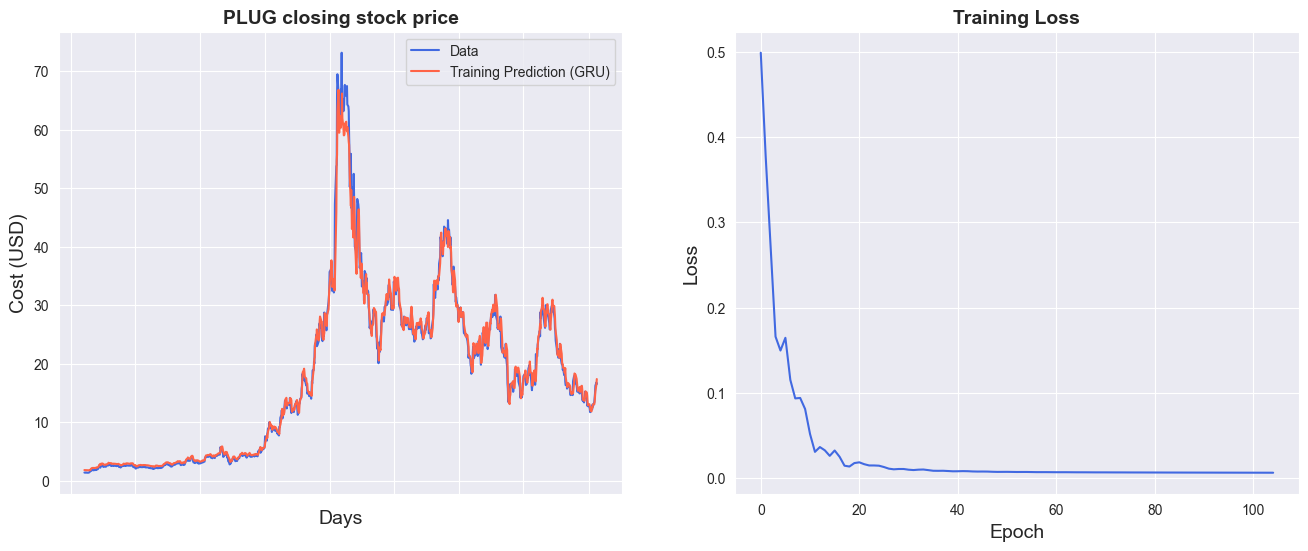

In [203]:
import seaborn as sns
# Set the visual style of the plots to 'darkgrid' for better readability and aesthetics.
sns.set_style("darkgrid")    

# Create a figure object to hold the subplots.
fig = plt.figure()
# Adjust the spacing between the subplots for clarity.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Create the first subplot for the original data and the training predictions.
plt.subplot(1, 2, 1)
# Plot the original closing stock prices with a lineplot for comparison.
ax = sns.lineplot(x = original.index, y = original2[0], label="Data", color='royalblue')
# Overlay the training predictions on the same plot for direct comparison.
ax = sns.lineplot(x = predict.index, y = predict2[6
                                                  ], label="Training Prediction (GRU)", color='tomato')
# Set the title, labels, and other aesthetics for the first plot.
ax.set_title('PLUG closing stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
# Hide the x-tick labels to reduce clutter, assuming they're not critical for this visualization.
ax.set_xticklabels('', size=10)

# Create the second subplot for the training loss over epochs.
plt.subplot(1, 2, 2)
# Plot the training loss using a lineplot for easy tracking of reductions over time.
ax = sns.lineplot(data=hist, color='royalblue')
# Set the title and labels for the loss plot, matching the style of the first plot.
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
# Adjust the size of the figure to make both plots easily readable.
fig.set_figheight(6)
fig.set_figwidth(16)


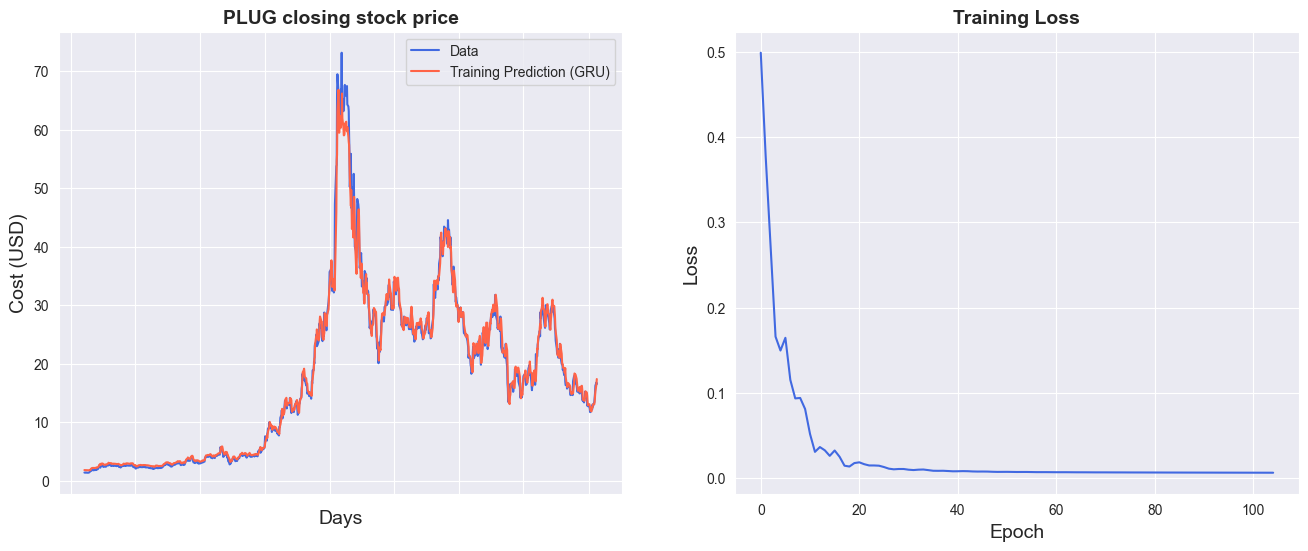

In [181]:
import seaborn as sns
# Set the visual style of the plots to 'darkgrid' for better readability and aesthetics.
sns.set_style("darkgrid")    

# Create a figure object to hold the subplots.
fig = plt.figure()
# Adjust the spacing between the subplots for clarity.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Create the first subplot for the original data and the training predictions.
plt.subplot(1, 2, 1)
# Plot the original closing stock prices with a lineplot for comparison.
ax = sns.lineplot(x = original.index, y = original['Day 1'], label="Data", color='royalblue')
# Overlay the training predictions on the same plot for direct comparison.
ax = sns.lineplot(x = predict.index, y = predict['Day 7'], label="Training Prediction (GRU)", color='tomato')
# Set the title, labels, and other aesthetics for the first plot.
ax.set_title('PLUG closing stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
# Hide the x-tick labels to reduce clutter, assuming they're not critical for this visualization.
ax.set_xticklabels('', size=10)

# Create the second subplot for the training loss over epochs.
plt.subplot(1, 2, 2)
# Plot the training loss using a lineplot for easy tracking of reductions over time.
ax = sns.lineplot(data=hist, color='royalblue')
# Set the title and labels for the loss plot, matching the style of the first plot.
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
# Adjust the size of the figure to make both plots easily readable.
fig.set_figheight(6)
fig.set_figwidth(16)


In [189]:
import math, time
from sklearn.metrics import mean_squared_error

# Make predictions using the trained model on both the training and testing datasets.
y_test_pred = model(x_test_gru)

# Invert predictions to transform them back to the original data scale, undoing the earlier normalization.
# This step is necessary to make the error metrics comparable to the original data values.
y_train_pred_inv = scaler.inverse_transform(y_train_pred.detach().numpy())  # Inverse transform for training predictions
y_train_inv = scaler.inverse_transform(y_train_gru.detach().numpy())  # Inverse transform for actual training values
y_test_pred_inv = scaler.inverse_transform(y_test_pred.detach().numpy())  # Inverse transform for testing predictions
y_test_inv = scaler.inverse_transform(y_test_gru.detach().numpy())  # Inverse transform for actual testing values

# # Calculate the root mean squared error (RMSE) for both training and testing datasets.
# # RMSE is a standard way to measure the error of a model in predicting quantitative data.
# # Squaring the errors, averaging them, and taking the square root gives us the RMSE.
# trainScore = math.sqrt(mean_squared_error(y_train_inv[:,6], y_train_pred_inv[:,6]))  # RMSE for the training data
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(y_test_inv[:,6], y_test_pred_inv[:,6]))  # RMSE for the testing data
# print('Test Score: %.2f RMSE' % (testScore))

for i in range(7):  # Assuming there are 7 columns
    trainScore = math.sqrt(mean_squared_error(y_train_inv[:, i], y_train_pred_inv[:, i]))
    testScore = math.sqrt(mean_squared_error(y_test_inv[:, i], y_test_pred_inv[:, i]))
    print(f'Column {i+1} Train Score: {trainScore:.2f} RMSE')
    print(f'Column {i+1} Test Score: {testScore:.2f} RMSE')


# Append the training and testing scores, along with the training time, to the 'gru' list.
# This could be useful for later analysis or comparison with other models.
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)


Column 1 Train Score: 1.43 RMSE
Column 1 Test Score: 0.53 RMSE
Column 2 Train Score: 1.96 RMSE
Column 2 Test Score: 0.70 RMSE
Column 3 Train Score: 2.39 RMSE
Column 3 Test Score: 0.83 RMSE
Column 4 Train Score: 2.85 RMSE
Column 4 Test Score: 0.92 RMSE
Column 5 Train Score: 3.22 RMSE
Column 5 Test Score: 1.00 RMSE
Column 6 Train Score: 3.45 RMSE
Column 6 Test Score: 1.15 RMSE
Column 7 Train Score: 3.65 RMSE
Column 7 Test Score: 1.26 RMSE


In [202]:
import math, time
from sklearn.metrics import mean_squared_error

# Make predictions using the trained model on both the training and testing datasets.
y_test_pred = model(x_test_gru)

# Invert predictions to transform them back to the original data scale, undoing the earlier normalization.
# This step is necessary to make the error metrics comparable to the original data values.
y_train_pred_inv = scaler.inverse_transform(y_train_pred.detach().numpy())  # Inverse transform for training predictions
y_train_inv = scaler.inverse_transform(y_train_gru.detach().numpy())  # Inverse transform for actual training values
y_test_pred_inv = scaler.inverse_transform(y_test_pred.detach().numpy())  # Inverse transform for testing predictions
y_test_inv = scaler.inverse_transform(y_test_gru.detach().numpy())  # Inverse transform for actual testing values

# Calculate the root mean squared error (RMSE) for both training and testing datasets.
# RMSE is a standard way to measure the error of a model in predicting quantitative data.
# Squaring the errors, averaging them, and taking the square root gives us the RMSE.
trainScore = math.sqrt(mean_squared_error(y_train_inv[:,0], y_train_pred_inv[:,0]))  # RMSE for the training data
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inv[:,6], y_test_pred_inv[:,6]))  # RMSE for the testing data
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.43 RMSE
Test Score: 1.26 RMSE


In [99]:
# shift train predictions for plotting
start_index_for_test_predictions = len(price_PLUG_scaled) - len(y_test_pred_inv)


trainPredictPlot = np.empty_like(price_PLUG_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred_inv)+lookback, :] = y_train_pred_inv

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_PLUG_scaled)
testPredictPlot[:, :] = np.nan
# testPredictPlot[len(y_train_pred_inv)+lookback-1:len(price_PLUG_scaled)-1, :] = y_test_pred_inv
testPredictPlot[start_index_for_test_predictions:, :] = y_test_pred_inv


original = scaler.inverse_transform(price_PLUG_scaled.reshape(-1, 1))


predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

ValueError: could not broadcast input array from shape (997,7) into shape (997,1)

In [124]:
# shift train predictions for plotting
start_index_for_test_predictions = len(price_PLUG_scaled) - len(y_test_pred_inv) - forecast_horizon  # Adjusting for the 6-day shift


trainPredictPlot = np.empty_like(price_PLUG_scaled)
trainPredictPlot[:, :] = np.nan
# Adjust this line to select only the 7th day predictions for insertion
trainPredictPlot[lookback:len(y_train_pred_inv)+lookback, :] = y_train_pred_inv[:, -1].reshape(-1, 1)


# shift test predictions for plotting
testPredictPlot = np.empty_like(price_PLUG_scaled)
testPredictPlot[:, :] = np.nan


# Ensure start index doesn't cause out-of-bound issues by limiting the shift
# Calculate the effective length of test predictions to be inserted
effective_length = len(y_test_pred_inv) - forecast_horizon  # Adjusting for the 6-day shift

# Apply the effective length to ensure we're not exceeding the bounds of 'testPredictPlot'
# We use 'max' to ensure the index is not negative; however, it's critical here to adjust the logic to avoid out-of-bound errors
testPredictPlot[start_index_for_test_predictions : start_index_for_test_predictions + effective_length, :] = y_test_pred_inv[:effective_length, -1].reshape(-1, 1)




original = scaler.inverse_transform(price_PLUG_scaled.reshape(-1, 1))


predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [125]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='PLUG Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()